# Общие подготовительные действия

Подключение необходимых библиотек.

In [113]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA

sns.set_theme()

Создание DataFrame из csv-файла с данными об автомобилях.

In [114]:
cars = pd.read_csv("car_price_prediction.csv")

# Первичный анализ набора данных

Набор данных об автомобилях содержит следующие признаки:
- `ID` - уникальный номер записи в наборе данных;
- `Price` - стоимость в долларах;
- `Levy` - таможенная пошлина;
- `Manufacturer` - бренд-производитель;
- `Model` - конкретная модель;
- `Prod. year` - год выпуска;
- `Category` - тип кузова;
- `Leather interior` - наличие кожаного салона;
- `Fuel type` - вид топлива, которое использует автомобиль;
- `Engine volume` - объём двигателя в литрах;
- `Mileage` - пробег автомобиля в километрах;
- `Cylinders` - количество цилиндров в двигателе;
- `Gear box type` - тип коробки передач;
- `Drive wheels` - тип привода;
- `Doors` - количество дверей;
- `Wheel` - расположение руля;
- `Color` - цвет кузова;
- `Airbags` - количество подушек безопасности.

In [115]:
cars

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


Для начала удалим столбец `ID`, так как для дальнейшего предсказывания стоимости автомобилей этот признак не несёт никакой роли.

In [116]:
cars.drop(columns=["ID"], inplace=True)
cars

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


Сразу после удаления номеров записей следует проверить набор данных на наличие дупликатов.

In [117]:
cars[cars.duplicated()]

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
192,314,1053,MERCEDES-BENZ,E 350,2014,Sedan,Yes,Diesel,3.5,149486 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
239,2901,503,HONDA,Civic,2012,Sedan,Yes,Hybrid,1.5,146403 km,4.0,Automatic,Front,04-May,Left wheel,White,0
264,392,1017,MERCEDES-BENZ,E 300,2017,Sedan,Yes,Petrol,2,1600 km,4.0,Automatic,Rear,04-May,Left wheel,Black,12
331,282,289,FORD,Escape,2008,Jeep,Yes,Hybrid,0.4,220474 km,4.0,Automatic,Front,04-May,Left wheel,Grey,0
347,39829,1811,LEXUS,GX 460,2010,Jeep,Yes,Petrol,4.6,155821 km,8.0,Automatic,4x4,04-May,Left wheel,Black,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19222,10036,639,HYUNDAI,Sonata,2014,Sedan,Yes,LPG,2,735970 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
19227,29793,1053,MERCEDES-BENZ,E 350,2014,Sedan,Yes,Diesel,3.5,219030 km,6.0,Automatic,4x4,04-May,Left wheel,Black,12
19228,706,1850,MERCEDES-BENZ,E 350,2008,Sedan,Yes,Diesel,3.5,122874 km,6.0,Automatic,Rear,04-May,Left wheel,Black,12
19231,5802,1055,MERCEDES-BENZ,E 350,2013,Sedan,Yes,Diesel,3.5,107800 km,6.0,Automatic,Rear,04-May,Left wheel,Grey,12


Оказывается, что в наборе данных достаточно много дупликатов. Следует от них избавиться.

In [118]:
cars.drop_duplicates(inplace=True)
cars.reset_index(drop=True, inplace=True)
cars

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15720,470,645,TOYOTA,Prius,2011,Hatchback,Yes,Hybrid,1.8,307325 km,4.0,Automatic,Front,04-May,Left wheel,Silver,12
15721,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
15722,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
15723,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4


Теперь переименуем столбцы для более удобного обращения к ним из кода.

In [119]:
cars.rename(columns={
    "Price": "price", "Levy": "levy", "Manufacturer": "manufacturer", "Model": "model",
    "Prod. year": "prod_year", "Category": "category", "Leather interior": "leather_interior",
    "Fuel type": "fuel_type", "Engine volume": "engine_volume", "Mileage": "mileage",
    "Cylinders": "cylinders", "Gear box type": "gear_box_type", "Drive wheels": "drive_wheels",
    "Doors": "doors", "Wheel": "wheel", "Color": "color", "Airbags": "airbags"
}, inplace=True)

Проверим набор данных на наличие пропусков и заодно посмотрим на типы данных всех столбцов.

In [120]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15725 entries, 0 to 15724
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             15725 non-null  int64  
 1   levy              15725 non-null  object 
 2   manufacturer      15725 non-null  object 
 3   model             15725 non-null  object 
 4   prod_year         15725 non-null  int64  
 5   category          15725 non-null  object 
 6   leather_interior  15725 non-null  object 
 7   fuel_type         15725 non-null  object 
 8   engine_volume     15725 non-null  object 
 9   mileage           15725 non-null  object 
 10  cylinders         15725 non-null  float64
 11  gear_box_type     15725 non-null  object 
 12  drive_wheels      15725 non-null  object 
 13  doors             15725 non-null  object 
 14  wheel             15725 non-null  object 
 15  color             15725 non-null  object 
 16  airbags           15725 non-null  int64 

Видно, что в явном виде пропуски отсутствуют. Также, тип данных некоторых столбцов следует аккуратно преобразовать в числовой.

Посмотрим на числовые характеристики уже имеющихся количественных признаков.

In [121]:
cars.describe().round(2)

,price,prod_year,cylinders,airbags
count,15725.00,15725.00,15725.00,15725.00
mean,20279.44,2010.52,4.48,6.54
std,210639.02,6.01,1.13,4.07
min,1.00,1939.00,1.00,0.00
25%,7527.00,2008.00,4.00,4.00
50%,14166.00,2012.00,4.00,6.00
75%,23364.00,2014.00,4.00,12.00
max,26307500.00,2020.00,16.00,16.00


Минимальное и максимальное значения столбца `price` слишком далеки от общего распределения, поэтому далее нужно будет подробнее посмотреть на распределение его значений на графике. Значения остальных количественных признаков на первый взгляд в порядке.

Посмотрим на основные характеристики категориальных признаков.

In [122]:
cars.describe(include="object")

,levy,manufacturer,model,category,leather_interior,fuel_type,engine_volume,mileage,gear_box_type,drive_wheels,doors,wheel,color
count,15725,15725,15725,15725,15725,15725,15725,15725,15725,15725,15725,15725,15725
unique,559,65,1590,11,2,7,107,7687,4,3,3,2,16
top,-,HYUNDAI,Prius,Sedan,Yes,Petrol,2,0 km,Automatic,Front,04-May,Left wheel,Black
freq,5684,3050,946,7010,10558,8824,3314,608,10088,10990,14855,14293,3835


Видно, что столбцы `levy`, `engine_volume`, `mileage` и `doors` стоит попытаться привести к числовому типу данных. Распределение остальных категориальных и бинарных признаков на первый взгляд в порядке. Также, в столбце `levy` самым частым значением является прочерк и, учитывая то, что это таможенная пошлина, которой у автомобиля может не быть, то эти значения нужно будет заменить на 0.

Создадим копию набора данных, над которой будем производить дальнейшие преобразования.

In [123]:
cars_new = cars.copy()

# Визуализация и преобразование значений признаков

## Стоимость `price`

Рассмотрим имеющееся распределение стоимости автомобилей с помощью диаграммы размаха.

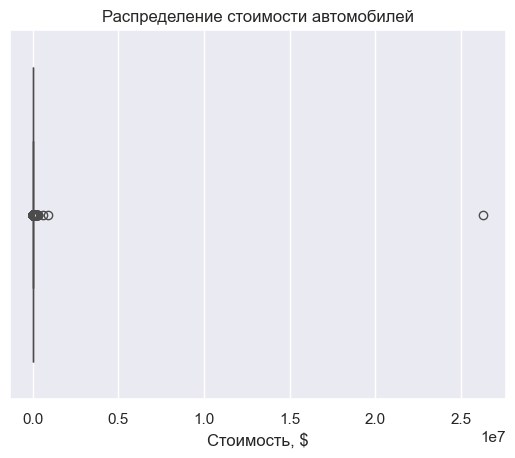

In [124]:
sns.boxplot(cars_new, x='price').set(
    title="Распределение стоимости автомобилей", xlabel="Стоимость, $"
);

Очевидно, что замеченная ранее крайне высокая стоимость является выбросом, поэтому найдём эту запись и посмотрим на неё.

In [125]:
cars_new[cars_new.price > 1000000]

,price,levy,manufacturer,model,prod_year,category,leather_interior,fuel_type,engine_volume,mileage,cylinders,gear_box_type,drive_wheels,doors,wheel,color,airbags
14036,26307500,-,OPEL,Combo,1999,Goods wagon,No,Diesel,1.7,99999 km,4.0,Manual,Front,02-Mar,Left wheel,Blue,0


Эта запись явно является чьей-то ошибкой, поэтому удалим её.

In [126]:
cars_new.drop(14036, inplace=True)
cars_new.reset_index(drop=True, inplace=True)

Ещё раз посмотрим на распределение стоимости автомобилей.

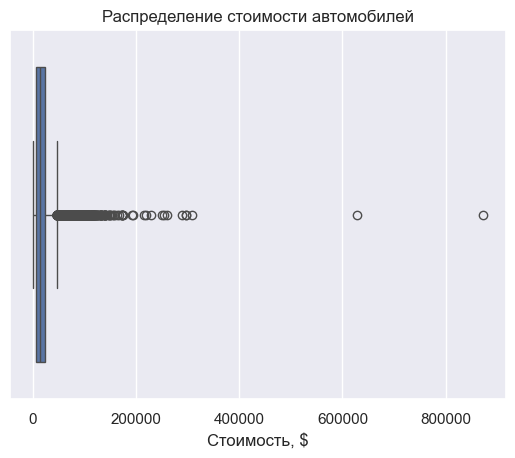

In [127]:
sns.boxplot(cars_new, x='price').set(
    title="Распределение стоимости автомобилей", xlabel="Стоимость, $"
);

Всё ещё большинство записей распределены в очень небольшом диапозоне относительно всего диапозона цен, поэтому следует проанализировать процентили, например: 90-й, 95-й и 99-й.

In [128]:
cars_new.price.describe([0.25, 0.75, 0.9, 0.95, 0.99]).round(2)

count     15724.00
mean      18607.65
std       20477.45
min           1.00
25%        7527.00
50%       14166.00
75%       23364.00
90%       39829.00
95%       50334.40
99%       89379.00
max      872946.00
Name: price, dtype: float64

Исходя из этого, 1% автомобилей имеют стоимость более 90000, при этом максимальное значение стоимости в 10 раз выше. За счёт этого в данный момент коэффициент асимметрии распределения очень сильно смещён влево, поэтому следует подробнее рассмотреть эти записи.

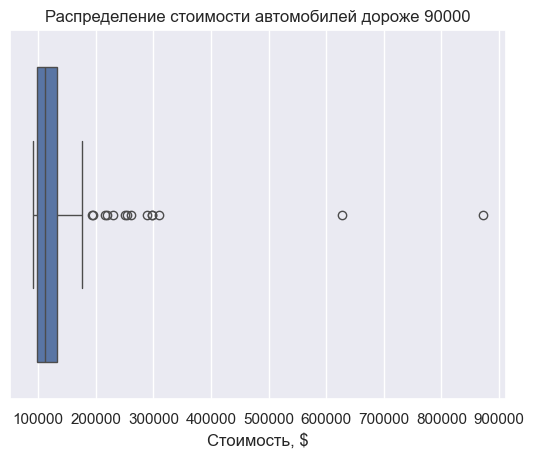

In [129]:
sns.boxplot(cars_new[cars_new.price > 90000], x="price").set(
    title="Распределение стоимости автомобилей дороже 90000", xlabel="Стоимость, $"
);

Для начала удалим записи, превышающие стоимость в 500000, которых всего две.

In [130]:
cars_new.drop(cars_new[cars_new.price > 500000].index, inplace=True)
cars_new.reset_index(drop=True, inplace=True)

Снова посмотрим на распределение автомобилей стоимостью более 90000.

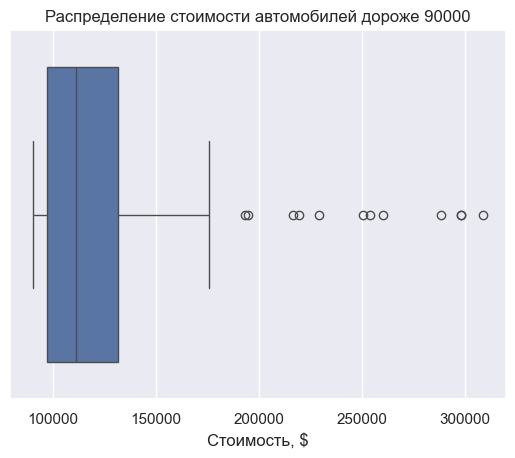

In [131]:
sns.boxplot(cars_new[cars_new.price > 90000], x="price").set(
    title="Распределение стоимости автомобилей дороже 90000", xlabel="Стоимость, $"
);

Начиная со стоимости около 180000 записи всё ещё очень редки, притом задают сильную асимметрию, поэтому посмотрим и на них.

In [132]:
cars_new[cars_new.price > 180000].sort_values("price")

,price,levy,manufacturer,model,prod_year,category,leather_interior,fuel_type,engine_volume,mileage,cylinders,gear_box_type,drive_wheels,doors,wheel,color,airbags
11260,193184,-,MERCEDES-BENZ,"GLE 400 Coupe, AMG Kit",2018,Jeep,Yes,Petrol,3.0 Turbo,20000 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1109,194438,-,MERCEDES-BENZ,G 350,2013,Jeep,Yes,Diesel,3.0 Turbo,94000 km,6.0,Automatic,4x4,04-May,Left wheel,Black,6
6469,216391,-,MERCEDES-BENZ,G 65 AMG G63 AMG,2013,Jeep,Yes,Petrol,5.5 Turbo,54000 km,8.0,Tiptronic,4x4,04-May,Left wheel,Black,12
2146,219527,-,BENTLEY,Continental GT,2012,Coupe,Yes,Petrol,4.0 Turbo,55500 km,8.0,Tiptronic,4x4,02-Mar,Left wheel,Black,0
6410,228935,-,MERCEDES-BENZ,GLE 63 AMG,2018,Jeep,Yes,Petrol,5.5 Turbo,23000 km,8.0,Tiptronic,4x4,04-May,Left wheel,Black,16
12743,250574,1481,MERCEDES-BENZ,GLE 400,2017,Jeep,Yes,Petrol,3.0 Turbo,81600 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,12
5232,254024,1292,MERCEDES-BENZ,GLE 400 A M G,2016,Jeep,Yes,Petrol,3.0 Turbo,73000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,12
9221,260296,-,LEXUS,LX 570,2018,Jeep,Yes,Petrol,5.7 Turbo,17700 km,8.0,Tiptronic,4x4,04-May,Left wheel,Black,10
6802,288521,2269,BMW,M5 Машина в максимально,2018,Sedan,Yes,Petrol,4.4,13500 km,8.0,Tiptronic,4x4,04-May,Left wheel,Black,0
8112,297930,-,MERCEDES-BENZ,AMG GT S,2015,Coupe,Yes,Petrol,4.0 Turbo,20000 km,8.0,Tiptronic,Rear,02-Mar,Left wheel,White,16


Их всего 12, поэтому их можно удалить в пользу лучшего распределения цен.

In [133]:
cars_new.drop(cars_new[cars_new.price > 180000].index, inplace=True)
cars_new.reset_index(drop=True, inplace=True)

Ещё раз посмотрим на распределение автомобилей стоимостью более 90000.

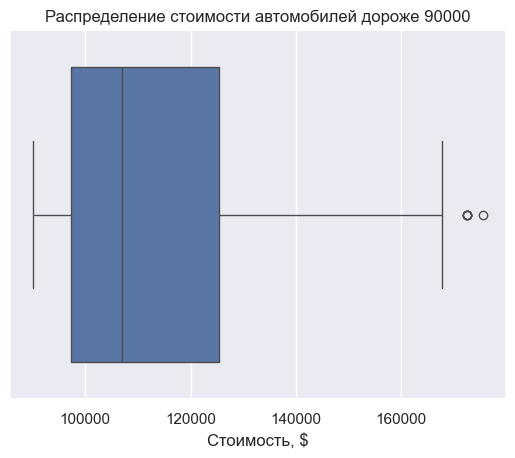

In [134]:
sns.boxplot(cars_new[cars_new.price > 90000], x="price").set(
    title="Распределение стоимости автомобилей дороже 90000", xlabel="Стоимость, $"
);

Вид распределения стал намного лучше. Теперь снова посмотрим на общее распределение цен.

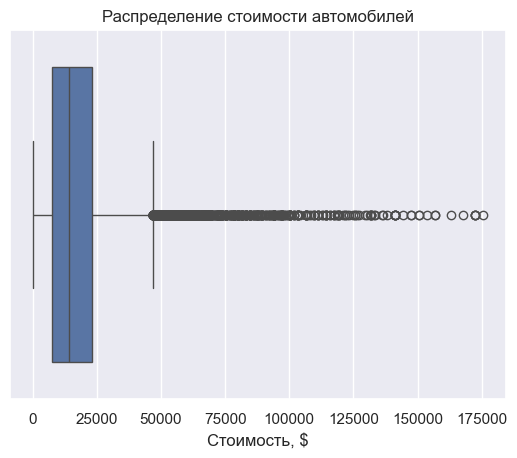

In [135]:
sns.boxplot(cars_new, x="price").set(
    title="Распределение стоимости автомобилей", xlabel="Стоимость, $"
);

Вид общего распределения также стал значительно лучше, поэтому ещё раз посмотрим на 90-й, 95-й и 99-й процентили.

In [136]:
cars_new.price.describe([0.25, 0.75, 0.9, 0.95, 0.99]).round(2)

count     15710.0
mean      18337.1
std       17526.9
min           1.0
25%        7527.0
50%       14113.0
75%       23228.0
90%       39750.0
95%       50178.0
99%       87497.0
max      175622.0
Name: price, dtype: float64

Так, максимальное значение стоимости в 2 раза выше, чем 99-й процентиль, что приемлимо для распределения цен на разные автомобили.

Теперь рассмотрим автомобили с низкой стоимостью. Не исключено, что это могут быть настоящие данные, но эти записи могут сильно сказаться на общем качестве работы модели, так как основное распределение цен находится примерно в диапозоне от 5000 до 30000.

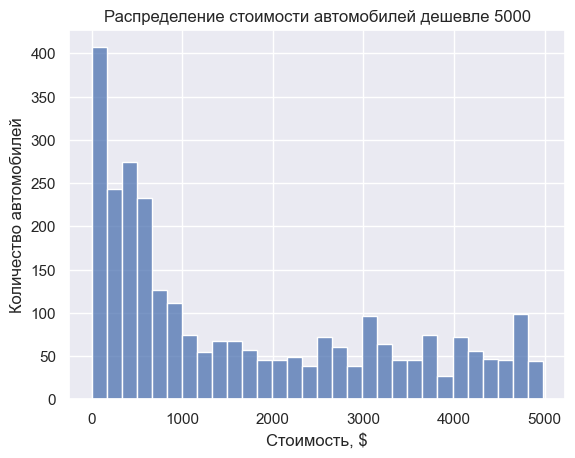

In [137]:
sns.histplot(cars_new[cars_new.price < 5000], x="price", bins=30).set(
    title="Распределение стоимости автомобилей дешевле 5000",
    xlabel="Стоимость, $", ylabel="Количество автомобилей"
);

Видно, что стоимость автомобилей распределена достаточно равномерно, за исключением промежутка от 1 до 1000, на который следует посмотреть подробнее.

In [138]:
cars_new[cars_new.price < 1000].sort_values("price")

,price,levy,manufacturer,model,prod_year,category,leather_interior,fuel_type,engine_volume,mileage,cylinders,gear_box_type,drive_wheels,doors,wheel,color,airbags
14027,1,1202,CHEVROLET,Lacetti,2006,Hatchback,No,Petrol,1.6,200000 km,4.0,Manual,Front,04-May,Left wheel,Black,2
6846,1,-,OPEL,Astra,1999,Sedan,Yes,Petrol,1.6,122231 km,4.0,Manual,Front,04-May,Left wheel,Silver,4
14480,3,-,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,106422 km,4.0,Tiptronic,Front,04-May,Left wheel,White,6
220,3,-,HYUNDAI,Elantra,2011,Sedan,Yes,Petrol,1.8,80000 km,4.0,Tiptronic,Front,04-May,Left wheel,Grey,6
5267,3,-,MERCEDES-BENZ,CLK 230,2004,Coupe,Yes,Petrol,2.3,328000 km,4.0,Manual,Rear,02-Mar,Left wheel,Blue,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15434,941,502,HONDA,FIT,2013,Hatchback,Yes,Petrol,1.5,170466 km,4.0,Automatic,Front,04-May,Left wheel,Silver,12
2369,941,1811,LEXUS,GX 460,2010,Jeep,Yes,Petrol,4.6,260771 km,8.0,Automatic,4x4,04-May,Left wheel,Black,0
19,941,1850,LEXUS,RX 400,2008,Jeep,Yes,Hybrid,3.5,364523 km,6.0,Automatic,4x4,04-May,Left wheel,Black,12
10,941,1053,MERCEDES-BENZ,E 350,2014,Sedan,Yes,Diesel,3.5,184467 km,6.0,Automatic,Rear,04-May,Left wheel,White,12


Как оказывается, эти записи составляют примерно 11% от всего набора данных. При этом они могут ухудшить качество модели, так как слишком сильно отстоят от основной массы значений и их достаточно много. Их также следует удалить.

In [139]:
cars_new.drop(cars_new[cars_new.price < 1000].index, inplace=True)
cars_new.reset_index(drop=True, inplace=True)

Ещё раз посмотрим на распределение автомобилей со сравнительно низкой стоимостью.

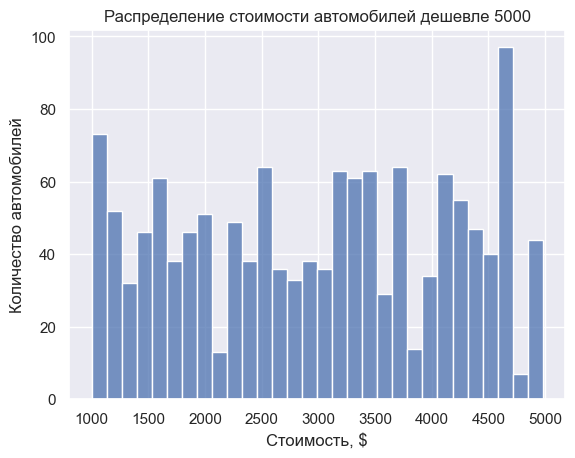

In [140]:
sns.histplot(cars_new[cars_new.price < 5000], x="price", bins=30).set(
    title="Распределение стоимости автомобилей дешевле 5000",
    xlabel="Стоимость, $", ylabel="Количество автомобилей"
);

Теперь распределение выглядит достаточно равномерно. Посмотрим также на общее распределение стоимости автомобилей.

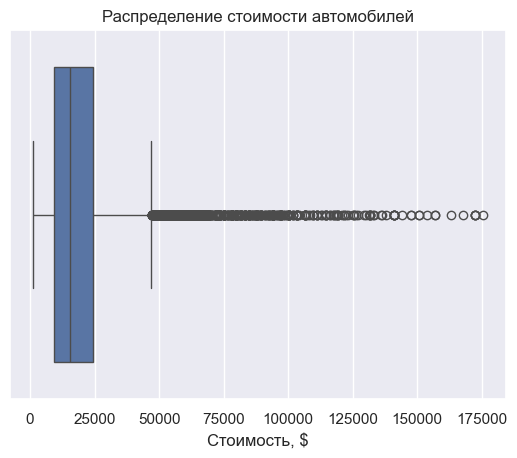

In [141]:
sns.boxplot(cars_new, x="price").set(
    title="Распределение стоимости автомобилей", xlabel="Стоимость, $"
);

И посмотрим на основные числовые характеристики распределения стоимости.

In [142]:
cars_new.price.describe().round(2)

count     14315.00
mean      20086.28
std       17397.25
min        1000.00
25%        9408.00
50%       15681.00
75%       24462.00
max      175622.00
Name: price, dtype: float64

Учитывая то, что это распределение стоимости разнообразных автомобилей, то теперь оно выглядит вполне нормально.

## Таможенная пошлина `levy`

Ранее было замечено, что cамым частым значением данного признака является прочерк. Проверим, что это единственное возможное значение помимо конкретного числа.

In [143]:
levy_unique = sorted(cars_new.levy.unique())
levy_unique[:5] + ["..."] + levy_unique[-5:]

['-', '1011', '1016', '1017', '1018', '...', '986', '988', '993', '994', '997']

Так как значения отсортированы, то можно следать вывод, что кроме прочерка и чисел других значений у данного признака нет. Следовательно, можем заменить прочерки на нули и привести данный столбец к числовому типу данных.

In [144]:
cars_new.levy = cars_new.levy.replace("-", 0)
cars_new.levy = pd.to_numeric(cars_new.levy)
cars_new.levy.describe().round(2)

count    14315.00
mean       547.59
std        555.71
min          0.00
25%          0.00
50%        638.00
75%        836.00
max      11714.00
Name: levy, dtype: float64

Вдобавок, посмотрим у какого количества автомобилей указана таможенная пошлина.

In [145]:
len(cars_new[cars_new.levy > 0])

8999

Больше половины автомобилей в наборе данных имеют таможенную пошлину. Также, максимальное значение выглядит подозрительно, особенно учитывая 3-й квартиль, поэтому теперь посмотрим на распределение значений данного признака с помощью диаграммы размаха.

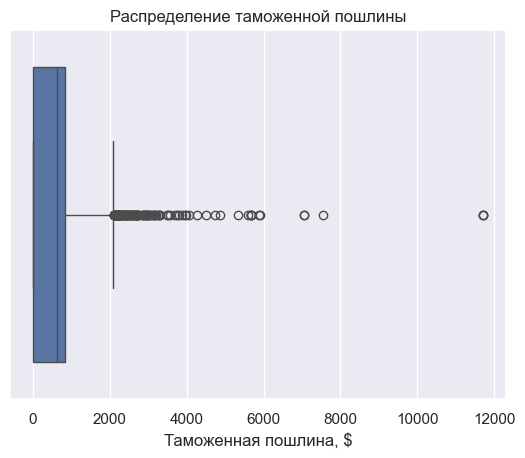

In [146]:
sns.boxplot(cars_new, x="levy").set(
    title="Распределение таможенной пошлины", xlabel="Таможенная пошлина, $"
);

Стоит посмотреть на записи, для которых значение `levy` превышает 5000.

In [147]:
cars_new[cars_new.levy > 5000].sort_values("levy")

,price,levy,manufacturer,model,prod_year,category,leather_interior,fuel_type,engine_volume,mileage,cylinders,gear_box_type,drive_wheels,doors,wheel,color,airbags
2951,14113,5332,MERCEDES-BENZ,E 300 AVANTGARDE-LTD,2007,Universal,Yes,Petrol,3,75000 km,8.0,Tiptronic,Rear,04-May,Right-hand drive,White,12
1933,10036,5603,HYUNDAI,Sonata,2014,Sedan,Yes,LPG,20,333686 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
6390,12544,5666,TOYOTA,Ipsum,2004,Minivan,No,Petrol,2.4,133000 km,4.0,Automatic,Front,04-May,Right-hand drive,White,5
1904,3150,5679,TOYOTA,Estima,1997,Minivan,No,Petrol,2.4,230000 km,4.0,Automatic,4x4,04-May,Right-hand drive,Silver,2
11140,7840,5679,MERCEDES-BENZ,C 240,1997,Universal,Yes,Petrol,2.4,60000 km,6.0,Automatic,Rear,04-May,Right-hand drive,Blue,12
13291,10349,5681,MITSUBISHI,Pajero,1996,Jeep,No,Petrol,2.4,169800 km,4.0,Automatic,4x4,02-Mar,Right-hand drive,Red,2
4293,7840,5877,MERCEDES-BENZ,CLK 430,2005,Cabriolet,No,Petrol,7.3,156470 km,12.0,Automatic,Rear,04-May,Left wheel,Black,12
4414,5645,5908,BMW,520,1999,Sedan,No,Petrol,2.5,0 km,6.0,Tiptronic,Rear,04-May,Right-hand drive,Silver,4
1781,10349,7058,SUBARU,Legacy,2005,Sedan,Yes,Petrol,3,147000 km,6.0,Tiptronic,4x4,04-May,Right-hand drive,Black,6
3237,13172,7063,TOYOTA,Alphard,2003,Minivan,Yes,LPG,3,190000 km,6.0,Automatic,4x4,04-May,Right-hand drive,Golden,8


Таких записей всего 14 и многие имеют крайне высокий налог по сравнению со стоимостью автомобиля. Основываясь на информации из Интернета, таможенная пошлина нечасто превышает 50% от стоимости автомобиля, а случаи, когда налог выше 70%, крайне редки и уникальны. Поэтому также рассмотрим записи, в которых таможенная пошлина превышает 70% от стоимости автомобиля.

In [148]:
cars_new[cars_new.levy / cars_new.price > 0.7].sort_values("levy")

,price,levy,manufacturer,model,prod_year,category,leather_interior,fuel_type,engine_volume,mileage,cylinders,gear_box_type,drive_wheels,doors,wheel,color,airbags
582,1019,765,MERCEDES-BENZ,GLA 250,2015,Jeep,Yes,Petrol,2,37786 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
593,1019,765,HYUNDAI,Tucson,2015,Jeep,Yes,Petrol,2,0 km,4.0,Automatic,Front,04-May,Left wheel,Black,0
7783,1019,765,BMW,328,2015,Sedan,Yes,Petrol,2,111166 km,4.0,Automatic,Rear,04-May,Left wheel,Silver,12
5977,1019,765,MERCEDES-BENZ,CLA 250,2015,Sedan,Yes,Petrol,2,74939 km,4.0,Automatic,Front,04-May,Left wheel,Grey,12
5062,1019,769,CHEVROLET,HHR,2011,Jeep,Yes,Petrol,2.2,126765 km,4.0,Automatic,Front,04-May,Left wheel,Black,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4414,5645,5908,BMW,520,1999,Sedan,No,Petrol,2.5,0 km,6.0,Tiptronic,Rear,04-May,Right-hand drive,Silver,4
12835,7213,7536,MITSUBISHI,Pajero,2000,Jeep,Yes,CNG,3.2,210000 km,6.0,Automatic,4x4,04-May,Right-hand drive,Black,2
14128,14740,11706,MERCEDES-BENZ,E 500 AVG,2005,Sedan,Yes,Petrol,5,56000 km,12.0,Tiptronic,Rear,04-May,Right-hand drive,Black,12
94,11917,11714,MERCEDES-BENZ,E 500 AMG,2003,Sedan,Yes,Petrol,5,150000 km,12.0,Tiptronic,Rear,04-May,Right-hand drive,White,12


Соответствующих записей уже существенно больше и сразу видно немало таких, в которых налог приближен к стоимости автомобиля или даже превышает её, что невозможно по логике его расчёта. Следует удалить данные записи, также как и те, в которых налог превышает 5000.

In [149]:
cars_new.drop(cars_new[(cars_new.levy / cars_new.price > 0.7) | (cars_new.levy > 5000)].index, inplace=True)
cars_new.reset_index(drop=True, inplace=True)

Посмотрим на распределение таможенной пошлины после удаления аномальных записей.

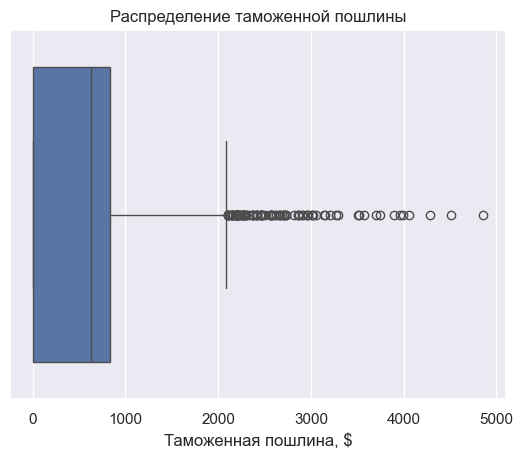

In [150]:
sns.boxplot(cars_new, x="levy").set(
    title="Распределение таможенной пошлины", xlabel="Таможенная пошлина, $"
);

## Бренд-производитель `manufacturer`

Рассмотрим всех представленных в наборе данных брендов-производителей.

In [151]:
def print_values(series, columns_number, value_len, count_len):
    counts = series.value_counts()
    values = sorted(counts.keys())
    rows_number = (len(values) + columns_number - 1) // columns_number
    for row in range(rows_number):
        line = ""
        for column in range(columns_number):
            index = column * rows_number + row
            if index < len(values):
                value = values[index]
                count = counts[value]
                line += f"{value:<{value_len}}{count:>{count_len}}\t"
        print(line)


print_values(series=cars_new.manufacturer, columns_number=6, value_len=14, count_len=4)

ACURA            9	DAEWOO          61	HUMMER           4	MASERATI         3	PORSCHE         43	TESLA            1	
ALFA ROMEO       4	DAIHATSU        12	HYUNDAI       2901	MAZDA          122	RENAULT         36	TOYOTA        2472	
ASTON MARTIN     1	DODGE           67	INFINITI        24	MERCEDES-BENZ 1284	ROVER            3	UAZ             12	
AUDI           163	FERRARI          2	ISUZU            4	MERCURY          3	SAAB             2	VAZ             46	
BENTLEY          1	FIAT            68	JAGUAR          33	MINI            42	SATURN           1	VOLKSWAGEN     518	
BMW            833	FORD           861	JEEP           124	MITSUBISHI     273	SCION            7	VOLVO           17	
BUICK           13	GAZ             10	KIA            377	MOSKVICH         2	SEAT             2	ZAZ              2	
CADILLAC        12	GMC             11	LANCIA           1	NISSAN         522	SKODA           20	სხვა             2	
CHEVROLET      892	GREATWALL        1	LAND ROVER      47	OPEL           389	SSAN

Все названия брендов уникальны и корректны, опечаток нет. Стоит обратить внимание на значение `სხვა`, что переводится с грузинского языка как «другой» или «прочий». Посмотрим на записи, соответствующие этому значению.

In [152]:
cars_new[cars_new.manufacturer == "სხვა"]

,price,levy,manufacturer,model,prod_year,category,leather_interior,fuel_type,engine_volume,mileage,cylinders,gear_box_type,drive_wheels,doors,wheel,color,airbags
1906,25089,0,სხვა,IVECO DAYLY,2007,Microbus,No,Diesel,2.3 Turbo,328000 km,4.0,Manual,Rear,04-May,Left wheel,White,1
3804,9408,0,სხვა,GONOW,2005,Jeep,Yes,Petrol,2.3,102000 km,4.0,Manual,Rear,04-May,Left wheel,Silver,2


Как оказывается, это автомобили марок Iveco и Gonow. На основе значений остальных признаков и поиска в Интернете можно предположить, что имелись в виду модели Iveco Daily 35S12 и Gonow GX6. Исправим записи о данных автомобилях.

In [153]:
cars_new.at[1906, "manufacturer"] = "IVECO"
cars_new.at[1906, "model"] = "Daily 35S12"
cars_new.at[3804, "manufacturer"] = "GONOW"
cars_new.at[3804, "model"] = "GX6"
cars_new.loc[[1906, 3804]]

,price,levy,manufacturer,model,prod_year,category,leather_interior,fuel_type,engine_volume,mileage,cylinders,gear_box_type,drive_wheels,doors,wheel,color,airbags
1906,25089,0,IVECO,Daily 35S12,2007,Microbus,No,Diesel,2.3 Turbo,328000 km,4.0,Manual,Rear,04-May,Left wheel,White,1
3804,9408,0,GONOW,GX6,2005,Jeep,Yes,Petrol,2.3,102000 km,4.0,Manual,Rear,04-May,Left wheel,Silver,2


Ранее можно было заметить, что есть немало марок, которым принадлежат всего несколько автомобилей. Посмотрим на такие марки.

In [154]:
manufacturers = cars_new.manufacturer.value_counts()
manufacturers[manufacturers <= 15]

manufacturer
BUICK           13
CADILLAC        12
DAIHATSU        12
UAZ             12
GMC             11
LINCOLN         11
GAZ             10
ACURA            9
CITROEN          9
SCION            7
ALFA ROMEO       4
HUMMER           4
ISUZU            4
ROVER            3
MERCURY          3
MASERATI         3
SAAB             2
SEAT             2
FERRARI          2
MOSKVICH         2
ZAZ              2
TESLA            1
HAVAL            1
IVECO            1
LANCIA           1
GONOW            1
BENTLEY          1
PONTIAC          1
SATURN           1
ASTON MARTIN     1
GREATWALL        1
Name: count, dtype: int64

Видно, что таких марок достаточно много, так что следует объединить их в одну группу `OTHER`. Так потеряется индивидуальность этих марок, но улучшится качество модели в целом, и уменьшится количество признаков, которые будут добавлены за счёт кодирования марок.

In [155]:
cars_new.manufacturer = cars_new.manufacturer.apply(
    lambda x: "OTHER" if manufacturers[x] <= 15 else x
)

Посмотрим, как изменилась общая картина после объединения редких марок в одну группу.

In [156]:
print_values(series=cars_new.manufacturer, columns_number=6, value_len=14, count_len=4)

AUDI           163	FIAT            68	JEEP           124	MINI            42	PORSCHE         43	TOYOTA        2472	
BMW            833	FORD           861	KIA            377	MITSUBISHI     273	RENAULT         36	VAZ             46	
CHEVROLET      892	HONDA          765	LAND ROVER      47	NISSAN         522	SKODA           20	VOLKSWAGEN     518	
CHRYSLER        21	HYUNDAI       2901	LEXUS          319	OPEL           389	SSANGYONG      415	VOLVO           17	
DAEWOO          61	INFINITI        24	MAZDA          122	OTHER          147	SUBARU         199	
DODGE           67	JAGUAR          33	MERCEDES-BENZ 1284	PEUGEOT         17	SUZUKI          65	


Марок стало в 2 раза меньше, а обобщённая группа содержит 147 автомобилей, что составляет примерно 1% от общего их числа.

Теперь посмотрим на распределение наиболее популярных марок автомобилей с помощью гистограммы.

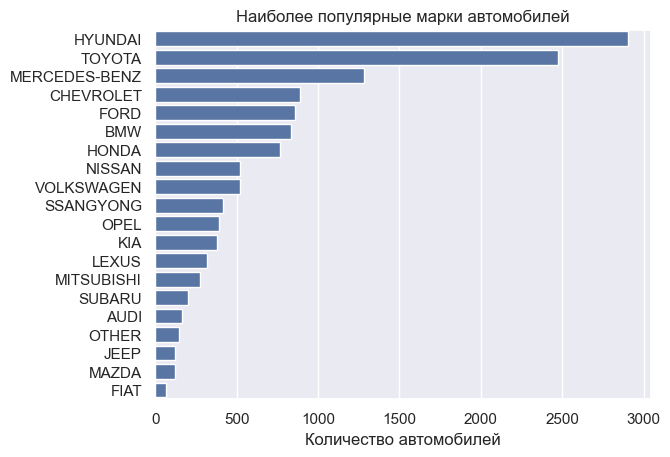

In [157]:
manufacturers_top = cars_new.manufacturer.value_counts().head(20)
sns.barplot(x=manufacturers_top.values, y=manufacturers_top.index).set(
    title="Наиболее популярные марки автомобилей",
    xlabel="Количество автомобилей", ylabel=""
);

В этом наборе данных представлено больше всего автомобилей марок Hyundai и Toyota.

## Модель `model`

Посмотрим на распределение наиболее популярных моделей автомобилей с помощью гистограммы.

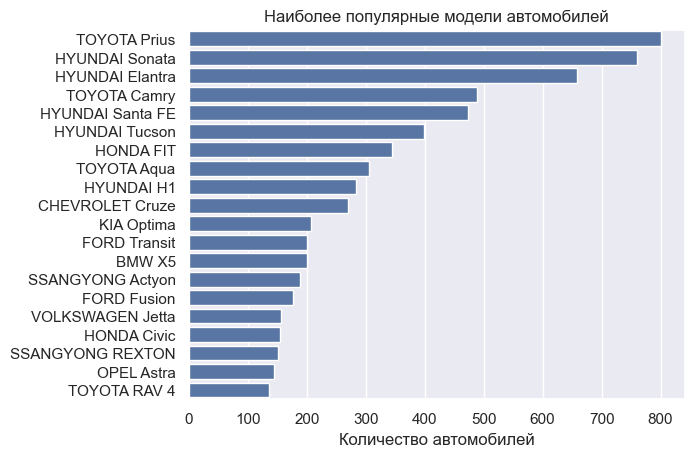

In [158]:
models_top = (cars_new.groupby(["manufacturer", "model"])
              .size()
              .reset_index(name="count")
              .sort_values("count", ascending=False)
              .head(20))
models_top["full_name"] = models_top.manufacturer + " " + models_top.model
sns.barplot(models_top, x="count", y="full_name").set(
    title="Наиболее популярные модели автомобилей",
    xlabel="Количество автомобилей", ylabel=""
);

Как и было видно ранее, самые популярные модели автомобилей принадлежат маркам Hyundai и Toyota.

## Год выпуска `prod_year`

Посмотрим на распределение годов выпуска автомобилей с помощью диаграммы размаха.

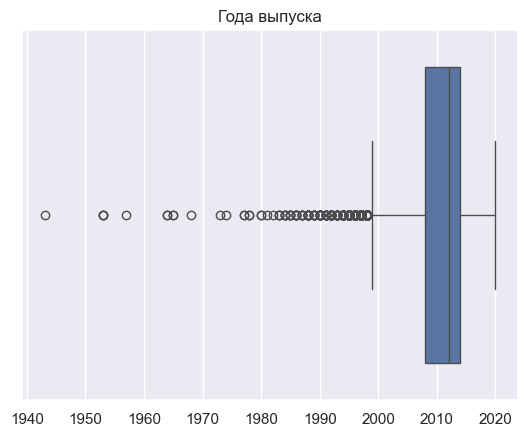

In [159]:
sns.boxplot(cars_new, x="prod_year").set(
    title="Года выпуска", xlabel=""
);

Большиство автомобилей выпущены в районе 2010 года, а общее распределение колеблется от 2000 до 2020 года.

Ради интереса посмотрим на автомобили, выпущенные раньше 1970 года.

In [160]:
cars_new[cars_new.prod_year < 1970].sort_values("prod_year")

,price,levy,manufacturer,model,prod_year,category,leather_interior,fuel_type,engine_volume,mileage,cylinders,gear_box_type,drive_wheels,doors,wheel,color,airbags
5159,119172,0,MERCEDES-BENZ,230 W153,1943,Sedan,Yes,Petrol,2.2,69000 km,4.0,Automatic,Rear,04-May,Left wheel,White,0
2492,51746,0,OTHER,20,1953,Sedan,No,Petrol,2,0 km,4.0,Manual,Rear,04-May,Left wheel,Beige,0
14054,3200,0,OTHER,20,1953,Jeep,No,Petrol,3.2,100000 km,4.0,Manual,4x4,02-Mar,Left wheel,Green,0
12690,15681,0,OTHER,400,1953,Hatchback,No,Petrol,1,250000 km,4.0,Manual,Rear,04-May,Left wheel,Beige,0
7304,7527,0,OTHER,31514,1957,Jeep,No,Petrol,2,0 km,4.0,Manual,4x4,02-Mar,Left wheel,Yellow,0
4324,5331,0,OTHER,Patriot,1964,Jeep,No,Petrol,2.4,50000 km,4.0,Manual,4x4,02-Mar,Left wheel,Green,0
9073,7840,0,OTHER,21,1964,Sedan,No,Petrol,2.4,0 km,4.0,Manual,Rear,04-May,Left wheel,Sky blue,0
5945,65858,0,FORD,Mustang,1965,Coupe,Yes,Petrol,4.7,68800 km,8.0,Automatic,Front,02-Mar,Left wheel,Red,2
10540,64290,3965,FORD,Mustang,1965,Coupe,Yes,Petrol,4.7 Turbo,1142 km,8.0,Automatic,Rear,02-Mar,Left wheel,Red,12
9674,2200,0,OTHER,31514,1968,Jeep,Yes,CNG,2.4,2147483647 km,4.0,Manual,4x4,04-May,Left wheel,Black,10


В эту десятку попали в основном отечественные производители. Тут же можно заметить УАЗ с пробегом в 2 миллиарда километров, к которому мы ещё вернёмся позже.

## Тип кузова `category`

Рассмотрим представленные типы кузова.

In [161]:
categories = cars_new.category.value_counts()
categories

category
Sedan          6281
Jeep           3787
Hatchback      2267
Minivan         509
Coupe           442
Universal       308
Microbus        284
Goods wagon     223
Pickup           44
Cabriolet        32
Limousine         6
Name: count, dtype: int64

Кажется непонятным значение `Goods wagon`, поэтому посмотрим на эти записи подробнее.

In [162]:
cars_new[cars_new.category == "Goods wagon"]

,price,levy,manufacturer,model,prod_year,category,leather_interior,fuel_type,engine_volume,mileage,cylinders,gear_box_type,drive_wheels,doors,wheel,color,airbags
10,3000,0,OPEL,Vectra,1997,Goods wagon,No,CNG,1.6,350000 km,4.0,Manual,Front,04-May,Left wheel,White,4
22,15681,1288,MERCEDES-BENZ,Vito,2007,Goods wagon,No,Diesel,2.0 Turbo,180000 km,6.0,Manual,Rear,04-May,Left wheel,White,4
118,3136,0,SUBARU,Legacy,2005,Goods wagon,No,Petrol,2.0 Turbo,180000 km,6.0,Tiptronic,4x4,04-May,Right-hand drive,Blue,6
144,21950,831,FORD,Transit,2011,Goods wagon,No,Diesel,2.4 Turbo,125000 km,4.0,Manual,4x4,04-May,Left wheel,White,2
236,6272,1522,OPEL,Zafira,2000,Goods wagon,No,Petrol,1.8,130000 km,4.0,Manual,Front,04-May,Left wheel,Silver,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13972,9722,1515,FORD,Transit Connect,2005,Goods wagon,No,Diesel,1.8,0 km,4.0,Manual,Front,02-Mar,Left wheel,Silver,0
14067,10500,0,FORD,Transit,1997,Goods wagon,No,Diesel,2.5 Turbo,11111 km,4.0,Manual,Rear,04-May,Left wheel,White,4
14074,7213,0,OPEL,Combo,2003,Goods wagon,No,Diesel,1.7 Turbo,253033 km,4.0,Manual,Front,02-Mar,Left wheel,Black,1
14092,11290,0,FORD,Transit,2000,Goods wagon,No,Diesel,2.5 Turbo,270000 km,4.0,Manual,Rear,>5,Left wheel,Orange,1


Исходя из данных примеров, можно сделать вывод, что в эту категорию входят и минивэны, и универсалы.

Посмотрим на распределение типов кузова автомобилей в виде гистограммы для лучшей наглядности.

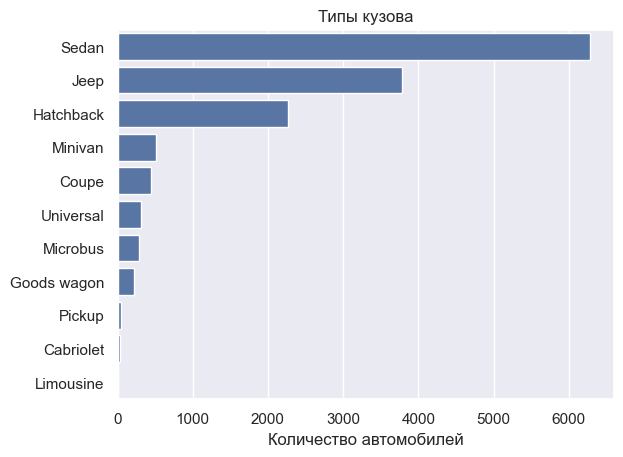

In [163]:
sns.barplot(x=categories.values, y=categories.index).set(
    title="Типы кузова", xlabel="Количество автомобилей", ylabel=""
);

## Наличие кожаного салона `leather_interior`

Посмотрим какое количество автомобилей имеет кожаной салон с помощью гистограммы.

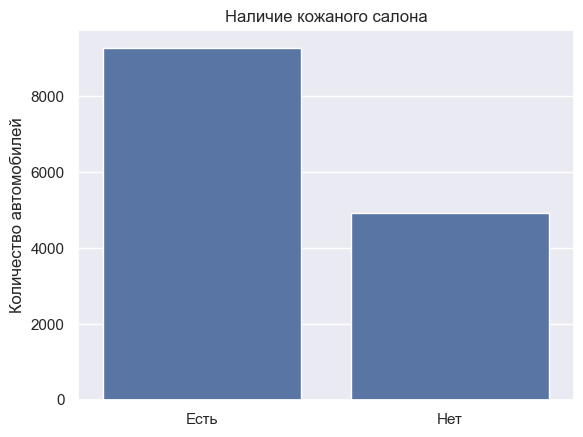

In [164]:
sns.countplot(cars_new, x="leather_interior", order=["Yes", "No"]).set(
    title="Наличие кожаного салона", xlabel="", ylabel="Количество автомобилей",
    xticks=range(2), xticklabels=["Есть", "Нет"]
);

Выходит, что примерно две трети автомобилей имеют кожаный салон.

## Вид топлива `fuel_type`

Рассмотрим виды топлива, которые используются автомобилями.

In [165]:
fuel_types = cars_new.fuel_type.value_counts()
fuel_types

fuel_type
Petrol            7811
Diesel            3092
Hybrid            2041
LPG                695
CNG                458
Plug-in Hybrid      85
Hydrogen             1
Name: count, dtype: int64

Переведём все названия на русский язык и разберёмся в сокращениях:
- `Petrol` - бензин;
- `Diesel` - дизельное топливо;
- `LPG` - сжиженный углеродный газ (пропан-бутан);
- `CNG` - сжатый природный газ (метан);
- `Hybrid` - гибрид двигателя внутреннего сгорания и электродвигателя;
- `Plug-in Hybrid` - усовершенствованный гибрид с возможностью зарядки от розетки;
- `Hydrogen` - водород.

Единственная запись о водороде кажется примечательной, поэтому следует на неё посмотреть.

In [166]:
cars_new[cars_new.fuel_type == "Hydrogen"]

,price,levy,manufacturer,model,prod_year,category,leather_interior,fuel_type,engine_volume,mileage,cylinders,gear_box_type,drive_wheels,doors,wheel,color,airbags
9784,20385,0,HYUNDAI,Sonata Hybrid,2012,Sedan,Yes,Hydrogen,2.4,116800 km,6.0,Tiptronic,Front,04-May,Left wheel,Grey,8


Исходя из значений других признаков, данная модель автомобиля в качестве топлива использует бензин, а не водород. Скорее всего, это ошибка в данных, которую следует исправить.

In [167]:
cars_new.at[9784, "fuel_type"] = "Petrol"
cars_new.loc[[9784]]

,price,levy,manufacturer,model,prod_year,category,leather_interior,fuel_type,engine_volume,mileage,cylinders,gear_box_type,drive_wheels,doors,wheel,color,airbags
9784,20385,0,HYUNDAI,Sonata Hybrid,2012,Sedan,Yes,Petrol,2.4,116800 km,6.0,Tiptronic,Front,04-May,Left wheel,Grey,8


Посмотрим на распределение видов топлива автомобилей в виде гистограммы для лучшей наглядности.

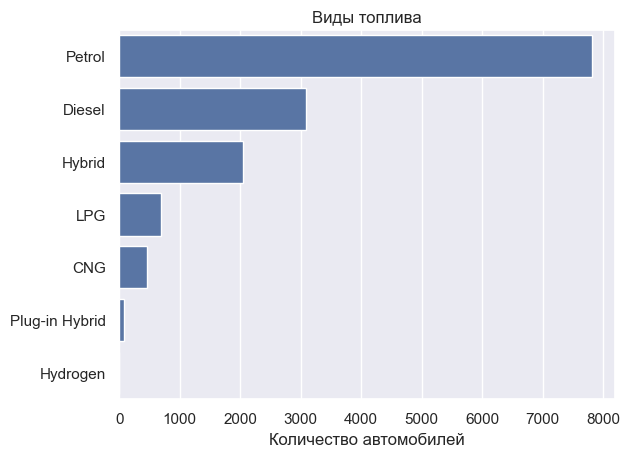

In [168]:
sns.barplot(x=fuel_types.values, y=fuel_types.index).set(
    title="Виды топлива", xlabel="Количество автомобилей", ylabel=""
);

## Объём двигателя `engine_volume`

Ранее можно было заметить, что некоторые записи имеют приписку «Turbo» после объёма двигателя. Рассмотрим все уникальные слова, встречающиеся в данном столбце.

In [169]:
cars_new.engine_volume.str.split().explode().unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '4', '1.6', '2.0', 'Turbo',
       '2.2', '3.3', '4.4', '3.0', '2.4', '1.4', '1.5', '2.3', '5.5',
       '2.8', '3.2', '4.6', '1.2', '1.7', '2.9', '0.5', '1.9', '3.6',
       '4.8', '5.3', '2.7', '5', '2.1', '0.7', '5.4', '4.7', '3.7', '3.8',
       '1', '2.6', '0.8', '0.2', '5.7', '6.2', '3.4', '0.4', '4.3', '4.2',
       '0', '0.3', '1.1', '5.9', '6.3', '5.6', '6', '0.6', '6.8', '4.5',
       '0.1', '1.0', '3.1', '5.0', '6.4', '0.9', '4.0', '5.2', '5.8'],
      dtype=object)

Помимо слова «Turbo» больше ничего нет. Значит речь идёт о турбированных двигателях. Это следует выделить в отдельный признак, а данный столбец преобразовать в числовой тип данных. Примечательно также, что среди значений есть 0, что нелогично для объёма двигателя.

In [170]:
cars_new[cars_new.engine_volume == "0"]

,price,levy,manufacturer,model,prod_year,category,leather_interior,fuel_type,engine_volume,mileage,cylinders,gear_box_type,drive_wheels,doors,wheel,color,airbags
1636,53941,87,OTHER,Model X,2018,Sedan,Yes,Petrol,0,81907 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
2486,2430,87,MERCEDES-BENZ,C 250,2013,Coupe,Yes,Petrol,0,121600 km,4.0,Automatic,Rear,04-May,Left wheel,White,12
2813,27356,87,HYUNDAI,Elantra,2016,Sedan,Yes,LPG,0,65004 km,4.0,Automatic,Front,04-May,Left wheel,White,4
3818,17663,87,TOYOTA,Aqua,2012,Hatchback,Yes,Petrol,0,118000 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
5960,47076,87,SSANGYONG,REXTON,2016,Jeep,Yes,Diesel,0,73968 km,4.0,Automatic,Front,04-May,Left wheel,Black,4
8109,12231,87,TOYOTA,Prius,2010,Hatchback,No,Hybrid,0,0 km,4.0,Automatic,Front,04-May,Left wheel,Golden,0


`Tesla Model X 2018` является единственным электромобилем среди представленных автомобилей, поэтому объём двигателя для него действительно равен 0. А для остальных автомобилей можно указать наиболее вероятный объём двигателя на основе модели и годе выпуска:
- `Mercedes-Benz C 250 2013` - 2.0 Turbo
- `Hyundai Elantra 2016` - 1.8
- `Toyota Aqua 2012` - 1.5
- `SsangYong Rexton 2016` - 2.0 Turbo
- `Toyota Prius 2010` - 1.8

Заполним теперь этими значениями имеющиеся пропуски.

In [171]:
cars_new.at[2486, "engine_volume"] = "2.0 Turbo"
cars_new.at[2813, "engine_volume"] = "1.8"
cars_new.at[3818, "engine_volume"] = "1.5"
cars_new.at[5960, "engine_volume"] = "2.0 Turbo"
cars_new.at[8109, "engine_volume"] = "1.8"
cars_new.loc[[2486, 2813, 3818, 5960, 8109]]

,price,levy,manufacturer,model,prod_year,category,leather_interior,fuel_type,engine_volume,mileage,cylinders,gear_box_type,drive_wheels,doors,wheel,color,airbags
2486,2430,87,MERCEDES-BENZ,C 250,2013,Coupe,Yes,Petrol,2.0 Turbo,121600 km,4.0,Automatic,Rear,04-May,Left wheel,White,12
2813,27356,87,HYUNDAI,Elantra,2016,Sedan,Yes,LPG,1.8,65004 km,4.0,Automatic,Front,04-May,Left wheel,White,4
3818,17663,87,TOYOTA,Aqua,2012,Hatchback,Yes,Petrol,1.5,118000 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
5960,47076,87,SSANGYONG,REXTON,2016,Jeep,Yes,Diesel,2.0 Turbo,73968 km,4.0,Automatic,Front,04-May,Left wheel,Black,4
8109,12231,87,TOYOTA,Prius,2010,Hatchback,No,Hybrid,1.8,0 km,4.0,Automatic,Front,04-May,Left wheel,Golden,0


Создадим отдельный признак для обозначения турбированных двигателей.

In [172]:
cars_new["turbo"] = cars_new.engine_volume.str.contains("Turbo")
cars_new.turbo = cars_new.turbo.map({True: "Yes", False: "No"})
cars_new = cars_new[cars_new.columns[:9].to_list() + ["turbo"] + cars_new.columns[9:-1].to_list()]
cars_new

,price,levy,manufacturer,model,prod_year,category,leather_interior,fuel_type,engine_volume,turbo,mileage,cylinders,gear_box_type,drive_wheels,doors,wheel,color,airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,No,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,No,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,No,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,No,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,No,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14178,8781,1107,OPEL,Combo,2007,Goods wagon,No,Diesel,1.7 Turbo,Yes,236000 km,4.0,Manual,Front,04-May,Left wheel,Beige,4
14179,7840,0,NISSAN,Skyline,2003,Sedan,Yes,Petrol,3,No,220000 km,6.0,Tiptronic,Rear,04-May,Right-hand drive,White,0
14180,8467,0,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,Yes,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
14181,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,No,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8


А также уберём слово «Turbo» из значений столбца `engine_volume` и приведём его к числовому типу данных.

In [173]:
cars_new.engine_volume = cars_new.engine_volume.str.replace(" Turbo", "")
cars_new.engine_volume = pd.to_numeric(cars_new.engine_volume)
cars_new

,price,levy,manufacturer,model,prod_year,category,leather_interior,fuel_type,engine_volume,turbo,mileage,cylinders,gear_box_type,drive_wheels,doors,wheel,color,airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,No,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,No,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,No,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,No,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,No,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14178,8781,1107,OPEL,Combo,2007,Goods wagon,No,Diesel,1.7,Yes,236000 km,4.0,Manual,Front,04-May,Left wheel,Beige,4
14179,7840,0,NISSAN,Skyline,2003,Sedan,Yes,Petrol,3.0,No,220000 km,6.0,Tiptronic,Rear,04-May,Right-hand drive,White,0
14180,8467,0,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0,Yes,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
14181,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,No,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8


Посмотрим на получившееся распределение объёма двигателей автомобилей с помощью диаграммы размаха.

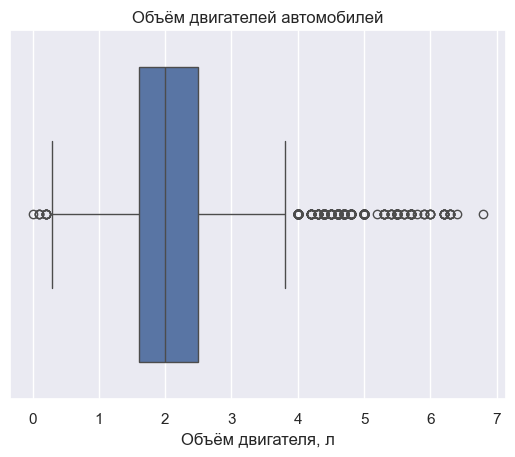

In [174]:
sns.boxplot(cars_new, x="engine_volume").set(
    title="Объём двигателей автомобилей", xlabel="Объём двигателя, л"
);

Наиболее распространёнными являются двухлитровые двигатели или похожего объёма. Большому объёму двигателя соответствует малое число записей, что логично, так как он напрямую влияет на стоимость автомобиля.

Теперь посмотрим какое количество автомобилей имеет трубированный двигатель с помощью гистограммы.

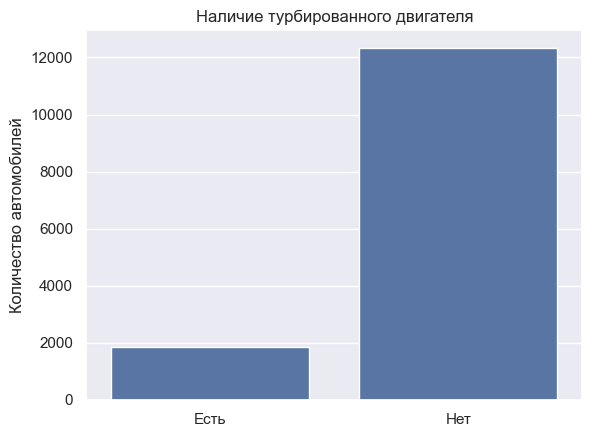

In [175]:
sns.countplot(cars_new, x="turbo", order=["Yes", "No"]).set(
    title="Наличие турбированного двигателя", xlabel="", ylabel="Количество автомобилей",
    xticks=range(2), xticklabels=["Есть", "Нет"]
);

Исходя из данный диаграммы, около 15% автомобилей имеют турбированный двигатель.

## Пробег `mileage`

Рассмотрим пробег автомобилей. Ранее уже можно было заметить, что он указан с обозначением единиц измерения, которые следует обрезать, чтобы привести данный столбец к целочисленному типу данных.

In [176]:
cars_new.mileage = cars_new.mileage.str[:-3].astype(int)

Теперь посмотрим на распределение пробега автомобилей с помощью диаграммы размаха.

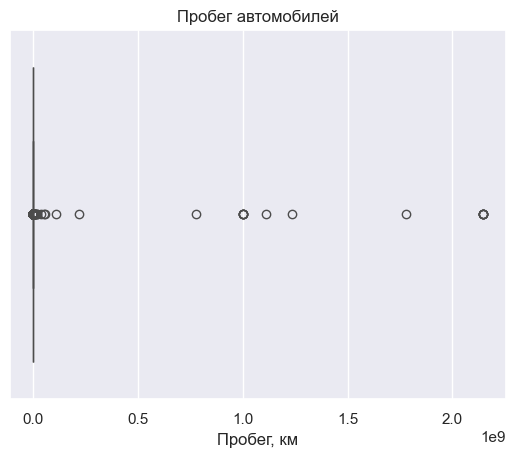

In [177]:
sns.boxplot(cars_new, x="mileage").set(
    title="Пробег автомобилей", xlabel="Пробег, км"
);

Видно, что присутствует немало записей, для которых пробег огромен и нереалистичен. Установим более-менее адекватный предел. Так как большинство автомобилей не старше 2000 года и возможный пробег при очень активном использовании за год равен около 50000 км, то получаем: `(2020 - 2000) * 50000 = 1000000` км. Поэтому считаем все записи с большим пробегом аномалиями и удаляем их.

In [178]:
cars_new.drop(cars_new[cars_new.mileage > 1000000].index, inplace=True)
cars_new.reset_index(drop=True, inplace=True)

Снова посмотрим на распределение пробега автомобилей.

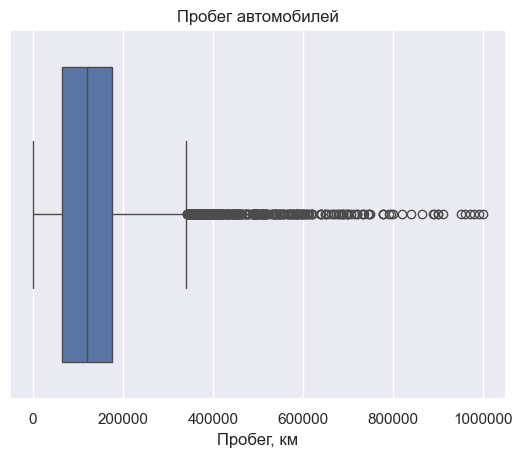

In [179]:
sns.boxplot(cars_new, x="mileage").set(
    title="Пробег автомобилей", xlabel="Пробег, км",
    xticks=range(0, 1000001, 200000), xticklabels=range(0, 1000001, 200000)
);

Теперь распределение выглядит достаточно хорошо. Из оставшихся автомобилей рассмотрим такие, у которых пробег более 800000 км.

In [180]:
cars_new[cars_new.mileage > 800000].sort_values("mileage")

,price,levy,manufacturer,model,prod_year,category,leather_interior,fuel_type,engine_volume,turbo,mileage,cylinders,gear_box_type,drive_wheels,doors,wheel,color,airbags
6005,10976,645,HYUNDAI,Elantra,2011,Sedan,No,Petrol,1.8,No,820000,4.0,Tiptronic,Front,04-May,Left wheel,Silver,6
11313,7840,0,NISSAN,Skyline,2001,Sedan,Yes,Petrol,2.5,No,840000,6.0,Tiptronic,Rear,04-May,Right-hand drive,Silver,8
13543,22894,1051,KIA,Optima ex,2016,Sedan,Yes,Petrol,2.4,No,864000,4.0,Tiptronic,Front,04-May,Left wheel,Grey,10
1042,14113,0,LAND ROVER,Range Rover,1996,Jeep,Yes,Diesel,2.5,Yes,888888,4.0,Manual,4x4,04-May,Left wheel,Blue,0
1684,30800,1058,MERCEDES-BENZ,E 350,2012,Sedan,Yes,Petrol,3.5,No,890000,6.0,Tiptronic,Rear,04-May,Left wheel,Grey,12
5490,37633,779,TOYOTA,RAV 4,2013,Jeep,No,Petrol,2.5,No,900000,4.0,Tiptronic,4x4,04-May,Left wheel,Green,8
2541,27911,1172,LEXUS,RX 350,2011,Jeep,Yes,Petrol,3.5,No,900000,12.0,Tiptronic,Front,04-May,Left wheel,Black,12
4211,21012,1051,KIA,Optima,2016,Sedan,No,Petrol,2.4,No,910000,4.0,Tiptronic,Front,04-May,Left wheel,Black,8
6821,10976,0,MAZDA,Rx-8,2003,Coupe,Yes,Petrol,1.3,No,950000,2.0,Manual,Rear,04-May,Left wheel,Black,6
5635,35438,0,BMW,X6,2009,Jeep,Yes,Petrol,4.4,Yes,960000,8.0,Tiptronic,4x4,04-May,Left wheel,Silver,12


С такими значениями уже становится трудно сказать, где аномалия, а где реальный случай, так как бывают, например, коммерческие или служебные автомобили, автомобили для такси или каршеринга, которые могут каждый день проходить более 100 км. Поэтому оставим данные значения как есть и посмотрим на основные числовые характеристики получившегося распределения.

In [181]:
cars_new.mileage.describe()

count     14115.000000
mean     132176.192278
std       98440.587346
min           0.000000
25%       66242.500000
50%      120000.000000
75%      176458.500000
max      999999.000000
Name: mileage, dtype: float64

## Количество цилиндров в двигателе `cylinders`

Посмотрим на распределение количества цилиндров в двигателе.

In [182]:
cars_new.cylinders.value_counts().sort_index()

cylinders
1.0        34
2.0        39
3.0       103
4.0     11209
5.0       148
6.0      2033
7.0         2
8.0       497
9.0         1
10.0       11
12.0       32
14.0        1
16.0        5
Name: count, dtype: int64

Следует привести данный столбец к целочисленному типу данных для удобства.

In [183]:
cars_new.cylinders = cars_new.cylinders.astype(int)

Посмотрим на распределение количества цилиндров в двигателе в виде гистограммы для лучшей наглядности.

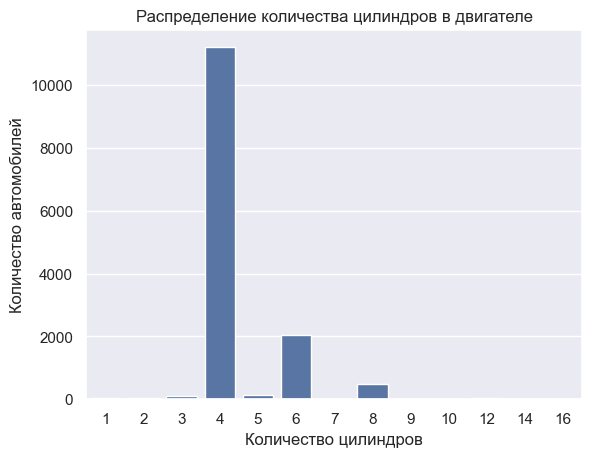

In [184]:
sns.countplot(cars_new, x="cylinders").set(
    title="Распределение количества цилиндров в двигателе",
    xlabel="Количество цилиндров", ylabel="Количество автомобилей"
);

Подавляющее количество автомобилей имеют 4 цилиндра в двигателе, примерно в 6 раз меньше автомобилей оснащены 6 цилиндрами, а оставшиеся значения все сравнительно редки.

## Коробка передач `gear_box_type`

Посмотрим на распределение типов коробки передач в автомобилях в виде гистограммы.

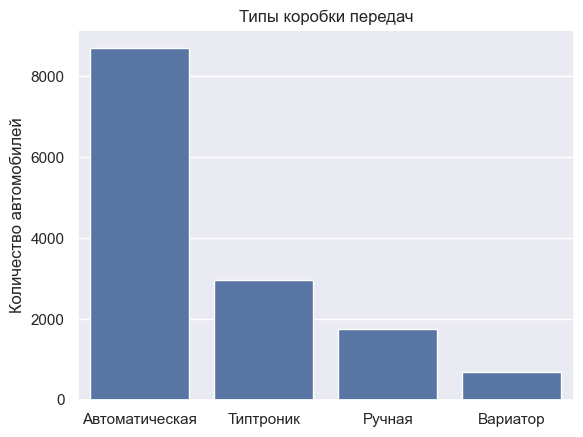

In [185]:
sns.countplot(cars_new, x="gear_box_type", order=["Automatic", "Tiptronic", "Manual", "Variator"]).set(
    title="Типы коробки передач", xlabel="", ylabel="Количество автомобилей",
    xticks=range(4), xticklabels=["Автоматическая", "Типтроник", "Ручная", "Вариатор"]
);

Наиболее распространённой является автоматическая коробка передач, затем идёт типтроник (автоматическая коробка передач с возможностью ручного переключения), потом ручная коробка передач и реже всего встречается вариатор (бесступенчатая коробка передач).

## Тип привода `drive_wheels`

Посмотрим на распределение типов привода в автомобилях в виде гистограммы.

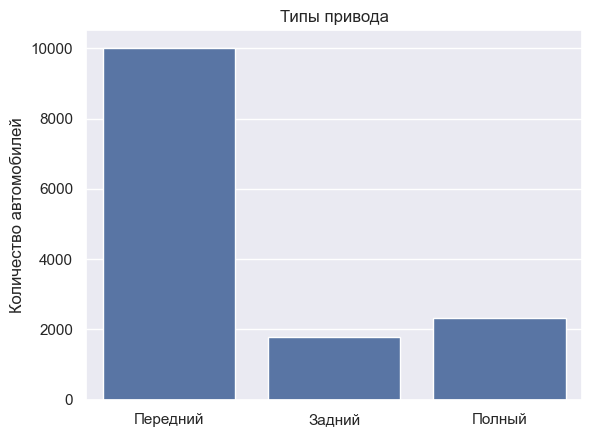

In [186]:
sns.countplot(cars_new, x="drive_wheels", order=["Front", "Rear", "4x4"]).set(
    title="Типы привода", xlabel="", ylabel="Количество автомобилей",
    xticks=range(3), xticklabels=["Передний", "Задний", "Полный"]
);

Подавляющее большинство автомобилей имеет передний привод, примерно в 5 раз меньшее количество автомобилей имеют полный привод и ещё меньшее количество имеют задний привод. 

## Количество дверей `doors`

Посмотрим на распределение количества дверей в автомобилях в виде гистограммы.

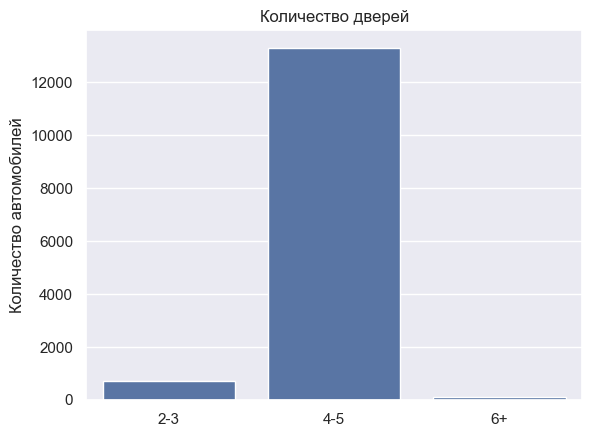

In [187]:
sns.countplot(cars_new, x="doors", order=["02-Mar", "04-May", ">5"]).set(
    title="Количество дверей", xlabel="", ylabel="Количество автомобилей",
    xticks=range(3), xticklabels=["2-3", "4-5", "6+"]
);

Подавляющее большинство автомобилей имеют 4-5 дверей, во много раз меньшее количество имеют 2-3 двери, и совсем небольшое количество имеют 6 и более дверей.

## Расположения руля `wheel`

Посмотрим какое количество автомобилей имеет руль слева с помощью гистограммы.

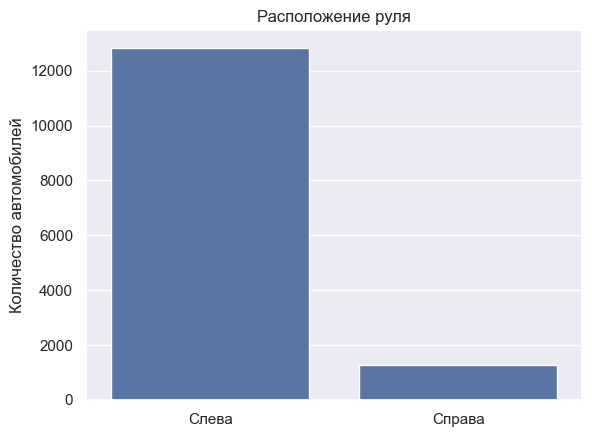

In [188]:
sns.countplot(cars_new, x="wheel").set(
    title="Расположение руля", xlabel="", ylabel="Количество автомобилей",
    xticks=range(2), xticklabels=["Слева", "Справа"]
);

Соотношение леворульных и праворульных автомобилей составляет примерно 10:1.

## Цвет кузова `color`

Посмотрим на распределение цветов кузова автомобилей с помощью гистограммы.

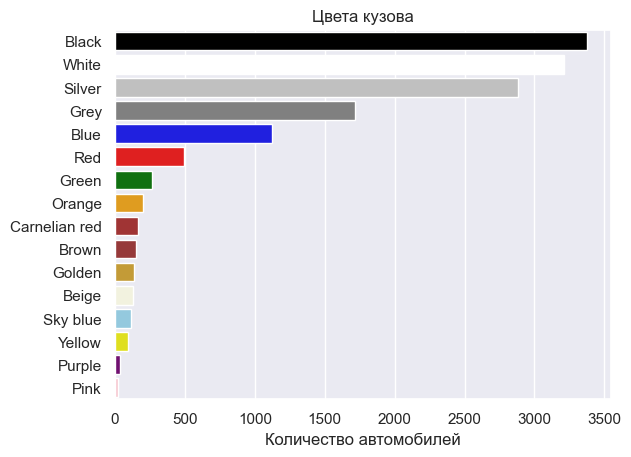

In [189]:
colors = cars_new.color.value_counts()
color_palette = [
    'black', 'white', 'silver', 'grey', 'blue', 'red', 'green', 'orange', 'firebrick',
    'brown', 'goldenrod', 'beige', 'skyblue', 'yellow', 'purple', 'pink'
]
sns.barplot(x=colors.values, y=colors.index, hue=colors.index, palette=color_palette).set(
    title="Цвета кузова", xlabel="Количество автомобилей", ylabel=""
);

Как и ожидалось, самыми распространёнными цветами кузова являются чёрный, белый и серебряный.

## Количество подушек безопасности `airbags`

Посмотрим на распределение количества подушек безопасности.

In [190]:
cars_new.airbags.value_counts().sort_index()

airbags
0     1137
1       69
2      985
3       34
4     4994
5       89
6     1234
7       80
8     1503
9       59
10     821
11      28
12    2966
13       1
14      20
15       7
16      88
Name: count, dtype: int64

Примечательно, что абсолютно у каждого значения от 0 до 16 включительно есть какое-то количество записей, соответствующих ему.

Посмотрим на распределение количества подушек безопасности в виде гистограммы для лучшей наглядности.

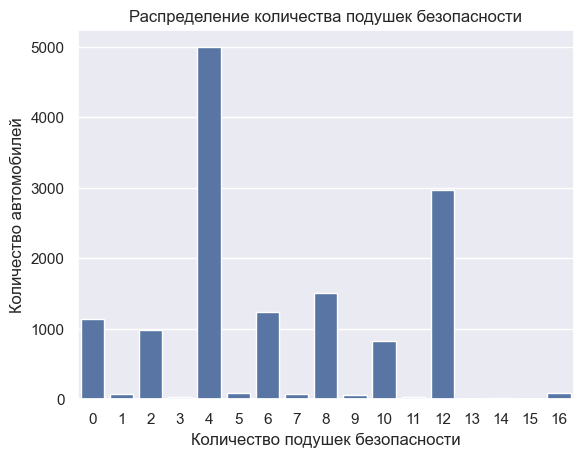

In [191]:
sns.countplot(cars_new, x="airbags").set(
    title="Распределение количества подушек безопасности",
    xlabel="Количество подушек безопасности", ylabel="Количество автомобилей"
);

Чаще всего в автомобилях устанавливают 4 подушки безопасности, реже 12, а также популярны некоторые другие чётные значения.

## Сравнение исходного и преобразованного набора данных

Сравним как изменились основные характеристики количественных признаков.

In [192]:
cars.describe().round(2)

,price,prod_year,cylinders,airbags
count,15725.00,15725.00,15725.00,15725.00
mean,20279.44,2010.52,4.48,6.54
std,210639.02,6.01,1.13,4.07
min,1.00,1939.00,1.00,0.00
25%,7527.00,2008.00,4.00,4.00
50%,14166.00,2012.00,4.00,6.00
75%,23364.00,2014.00,4.00,12.00
max,26307500.00,2020.00,16.00,16.00


In [193]:
cars_new.describe().round(2)

,price,levy,prod_year,engine_volume,mileage,cylinders,airbags
count,14115.00,14115.00,14115.00,14115.00,14115.00,14115.00,14115.00
mean,20305.90,536.13,2010.45,2.19,132176.19,4.45,6.31
std,17410.14,501.68,5.95,0.77,98440.59,1.11,3.91
min,1000.00,0.00,1943.00,0.00,0.00,1.00,0.00
25%,9408.00,0.00,2008.00,1.60,66242.50,4.00,4.00
50%,15681.00,629.00,2012.00,2.00,120000.00,4.00,4.00
75%,24709.00,836.00,2014.00,2.50,176458.50,4.00,10.00
max,175622.00,4860.00,2020.00,6.80,999999.00,16.00,16.00


Можно заметить, что изначально в наборе данных были автомобили, выпущенные раньше 1943 года. Посмотрим, почему они были выброшены.

In [194]:
cars[cars.prod_year < 1943]

,price,levy,manufacturer,model,prod_year,category,leather_interior,fuel_type,engine_volume,mileage,cylinders,gear_box_type,drive_wheels,doors,wheel,color,airbags
8827,157,-,ROLLS-ROYCE,Phantom,1939,Cabriolet,Yes,Petrol,5,129000 km,8.0,Automatic,Rear,04-May,Left wheel,Silver,0
9579,157,-,MERCEDES-BENZ,S 500,1939,Limousine,Yes,Petrol,2.4,126000 km,4.0,Automatic,Rear,04-May,Left wheel,White,0
12997,200,-,ROLLS-ROYCE,Phantom,1939,Limousine,Yes,Petrol,2.2,169000 km,4.0,Manual,Rear,04-May,Left wheel,White,0


Данные автомобили стоят аномально дёшево, поэтому и были убраны из набора данных.

Сравним как изменились основные характеристики категориальных признаков.

In [195]:
cars.describe(include="object")

,levy,manufacturer,model,category,leather_interior,fuel_type,engine_volume,mileage,gear_box_type,drive_wheels,doors,wheel,color
count,15725,15725,15725,15725,15725,15725,15725,15725,15725,15725,15725,15725,15725
unique,559,65,1590,11,2,7,107,7687,4,3,3,2,16
top,-,HYUNDAI,Prius,Sedan,Yes,Petrol,2,0 km,Automatic,Front,04-May,Left wheel,Black
freq,5684,3050,946,7010,10558,8824,3314,608,10088,10990,14855,14293,3835


In [196]:
cars_new.describe(include="object")

,manufacturer,model,category,leather_interior,fuel_type,turbo,gear_box_type,drive_wheels,doors,wheel,color
count,14115,14115,14115,14115,14115,14115,14115,14115,14115,14115,14115
unique,34,1540,11,2,6,2,4,3,3,2,16
top,HYUNDAI,Prius,Sedan,Yes,Petrol,No,Automatic,Front,04-May,Left wheel,Black
freq,2898,795,6246,9255,7775,12278,8701,10011,13302,12837,3379


Количество марок уменьшилось в два раза. Других заметных изменений нет.

# Визуализация зависимостей между признаками

Посмотрим, есть ли **зависимость между стоимостью и маркой автомобиля** с помощью диаграммы размаха. Для этого выберем автомобили десяти наиболее популярных брендов-производителей.

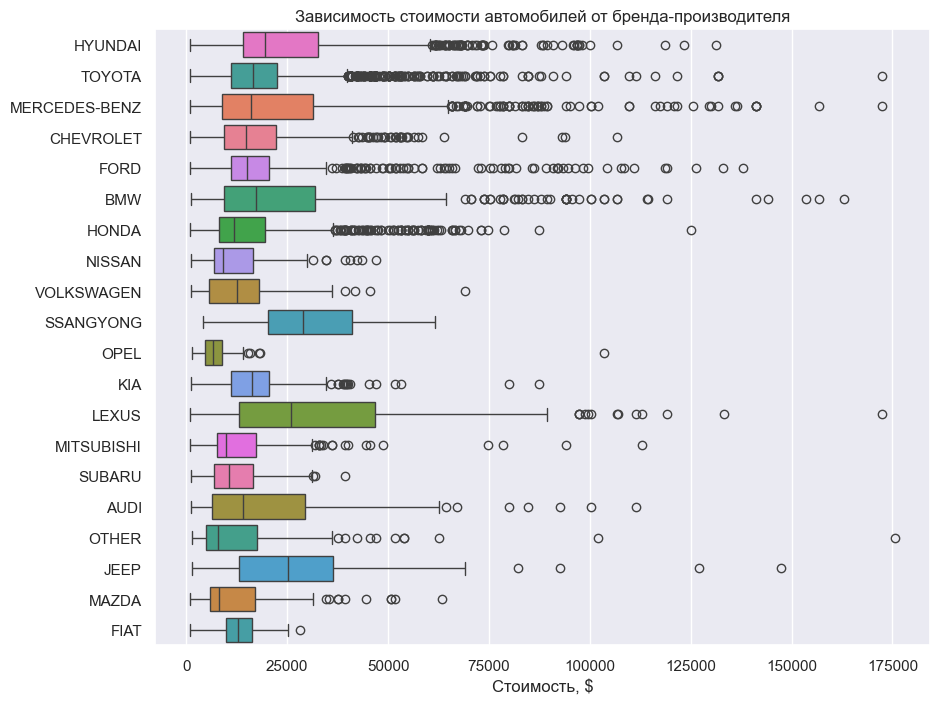

In [197]:
manufacturers_top = cars_new.manufacturer.value_counts().head(20).index
cars_manufacturers_top = cars_new[cars_new.manufacturer.isin(manufacturers_top)]
manufacturers_palette = sns.color_palette("husl", len(manufacturers_top))
np.random.shuffle(manufacturers_palette)
plt.figure(figsize=(10, 8))
sns.boxplot(
    cars_manufacturers_top, x="price", y="manufacturer", hue="manufacturer",
    order=manufacturers_top, hue_order=manufacturers_top, palette=manufacturers_palette
).set(
    title="Зависимость стоимости автомобилей от бренда-производителя",
    xlabel="Стоимость, $", ylabel=""
);

Зависимость между стоимостью и маркой видна достаточно явно. Например, автомобили марки `Lexus` в среднем являются наиболее дорогими. Также, исходя из полученной диаграммы, к "премиальным" брендам можно ещё отнести `Hyundai`, `Mercedes-Benz`, `BMW`, `SsangYong`, `Audi` и `Jeep`. Самыми недорогими являются автомобили марки `Opel`. Ситуация с остальными брендами примерно одинакова.

Посмотрим, есть ли **зависимость между стоимостью и годом выпуска автомобиля** с помощью диаграммы рассеяния.

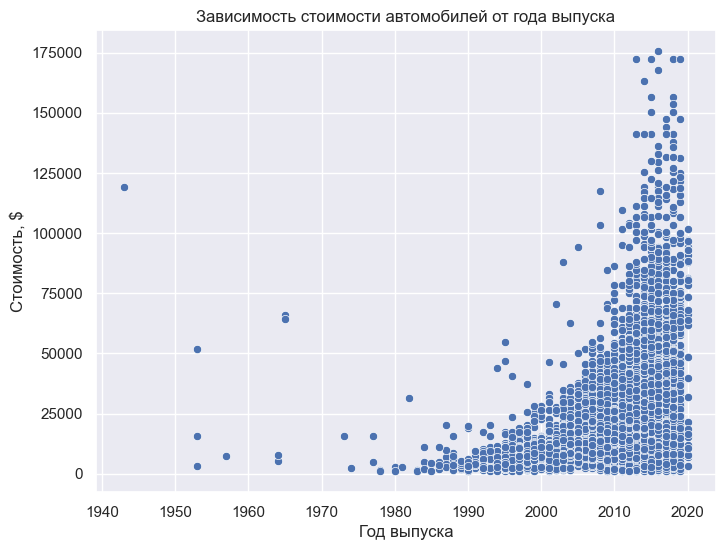

In [198]:
plt.figure(figsize=(8, 6))
sns.scatterplot(cars_new, x="prod_year", y="price").set(
    title="Зависимость стоимости автомобилей от года выпуска",
    xlabel="Год выпуска", ylabel="Стоимость, $"
);

Зависимость хорошо видна и логична: среди автомобилей, выпущенных до 1980-х годов, есть как дешёвые экземпляры, так и раритеты. Также, начиная с 1980-х годов, прослеживается закономерность, что чем позже был выпущен автомобиль, тем он дороже, что тоже логично.

Посмотрим на самый старинный и притом очень дорогой автомобиль.

In [199]:
cars_new[(cars_new.price > 100000) & (cars_new.prod_year < 1950)]

,price,levy,manufacturer,model,prod_year,category,leather_interior,fuel_type,engine_volume,turbo,mileage,cylinders,gear_box_type,drive_wheels,doors,wheel,color,airbags
5140,119172,0,MERCEDES-BENZ,230 W153,1943,Sedan,Yes,Petrol,2.2,No,69000,4,Automatic,Rear,04-May,Left wheel,White,0


И действительно, это легковой Mercedes-Benz, выпущенный в 1943 году, а соответственно очень редкий и наверняка хорошо сохранившийся экземпляр, судя по его стоимости.

Посмотрим, есть ли **зависимость между стоимостью и типом кузова автомобиля** с помощью диаграммы размаха.

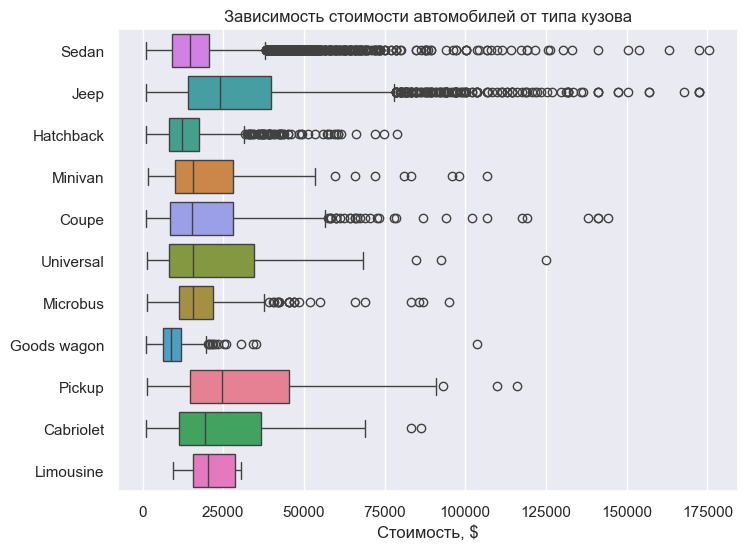

In [200]:
categories_top = cars_new.category.value_counts().index
categories_palette = sns.color_palette("husl", len(categories_top))
np.random.shuffle(categories_palette)
plt.figure(figsize=(8, 6))
sns.boxplot(
    cars_new, x="price", y="category", hue="category",
    order=categories_top, hue_order=categories_top, palette=categories_palette
).set(
    title="Зависимость стоимости автомобилей от типа кузова",
    xlabel="Стоимость, $", ylabel=""
);

Наиболее дорогими в среднем являются автомобили категорий `Pickup` (пикапы), `Jeep` (джипы) и `Cabriolet` (кабриолеты). А самыми недорогими оказываются автомобили категории `Goods wagon`, к которой ранее были отнесены минивэны и универсалы. Но, судя по данной диаграмме, автомобили категорий `Minivan` и `Universal` в среднем значительно дороже, чем категории `Goods wagon`, поэтому всё ещё остаётся непонятным принцип помещения автомобилей в данную категорию.

Посмотрим, есть ли **зависимость между стоимостью автомобиля и видом топлива** с помощью диаграммы размаха.

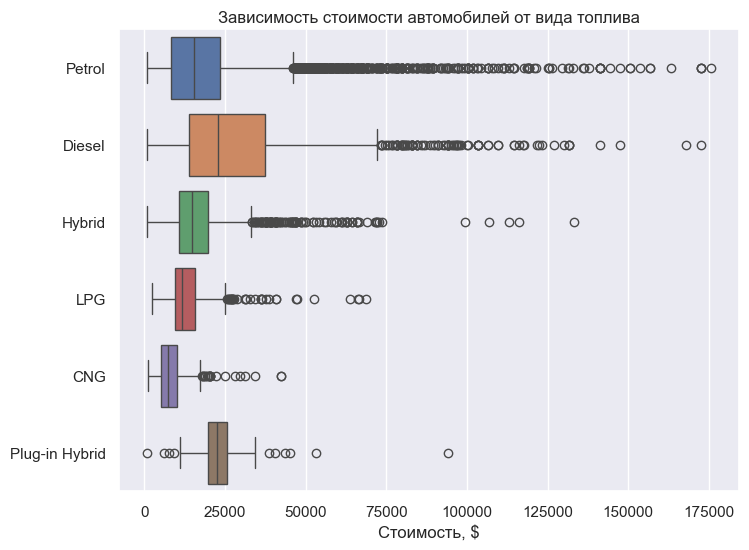

In [201]:
fuel_types_top = cars_new.fuel_type.value_counts().index
plt.figure(figsize=(8, 6))
sns.boxplot(
    cars_new, x="price", y="fuel_type", hue="fuel_type",
    order=fuel_types_top, hue_order=fuel_types_top
).set(
    title="Зависимость стоимости автомобилей от вида топлива",
    xlabel="Стоимость, $", ylabel=""
);

В среднем наиболее дорогими автомобилями оказываются те, которые работают на `Diesel` (дизельное топливо). Самыми недорогими в среднем являются автомобили, использующие в качестве топлива газ, а именно `LPG` (пропан-бутан) или `CNG` (метан).

Посмотрим, есть ли **зависимость между стоимостью и объёмом двигателя автомобиля** с помощью диаграммы рассеяния.

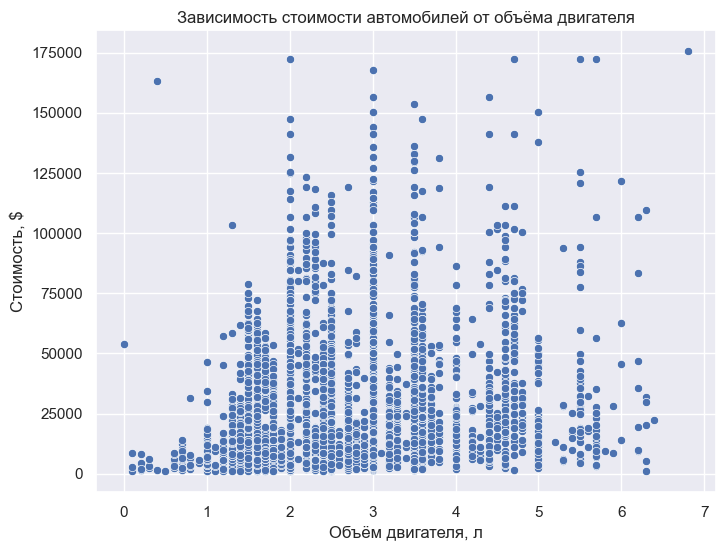

In [202]:
plt.figure(figsize=(8, 6))
sns.scatterplot(cars_new, x="engine_volume", y="price").set(
    title="Зависимость стоимости автомобилей от объёма двигателя",
    xlabel="Объём двигателя, л", ylabel="Стоимость, $"
);

В целом, зависимости как таковой нет. Есть как дорогие автомобили, так и дешёвые и с большим, и с малым объёмом двигателя.

Посмотрим, есть ли **зависимость между стоимостью и пробегом автомобиля** с помощью диаграммы рассеяния.ф

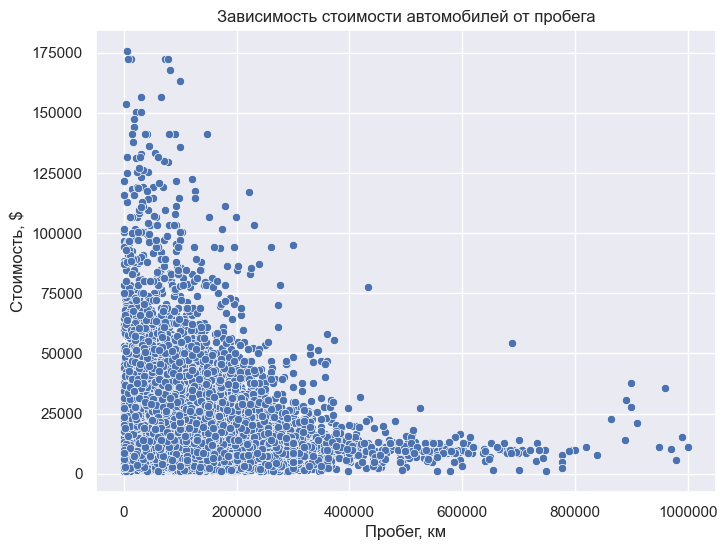

In [203]:
plt.figure(figsize=(8, 6))
sns.scatterplot(cars_new, x="mileage", y="price").set(
    title="Зависимость стоимости автомобилей от пробега",
    xlabel="Пробег, км", ylabel="Стоимость, $",
    xticks=range(0, 1000001, 200000), xticklabels=range(0, 1000001, 200000)
);

Исходя из полученной диаграммы, можно сделать вывод, что чем меньше пробег автомобиля, тем он дороже. Это логично, так как раз пробег небольшой, значит и в использовании автомобиль находился недолгое время, а значит, скорее всего, находится в хорошем состоянии.

# Кодирование категориальных признаков

Для начала создадим копию набора данных, с которой будем производить дальнейшие действия.

In [204]:
cars_enc = cars_new.copy()

Теперь посмотрим на то, какие категориальные признаки имеются и что с ними можно сделать.

In [205]:
cars_enc.describe(include="object")

,manufacturer,model,category,leather_interior,fuel_type,turbo,gear_box_type,drive_wheels,doors,wheel,color
count,14115,14115,14115,14115,14115,14115,14115,14115,14115,14115,14115
unique,34,1540,11,2,6,2,4,3,3,2,16
top,HYUNDAI,Prius,Sedan,Yes,Petrol,No,Automatic,Front,04-May,Left wheel,Black
freq,2898,795,6246,9255,7775,12278,8701,10011,13302,12837,3379


Признак `model` придётся исключить, так как он имеет слишком много уникальных значений.

In [206]:
cars_enc.drop("model", axis=1, inplace=True)

Признаки `leather_interior`, `turbo` и `wheel` являются бинарными, поэтому можно просто заменить их значения на 0 и 1.

In [207]:
cars_enc.leather_interior = cars_enc.leather_interior.map({"No": 0, "Yes": 1})
cars_enc.turbo = cars_enc.turbo.map({"No": 0, "Yes": 1})
cars_enc.wheel = cars_enc.wheel.map({"Left wheel": 0, "Right-hand drive": 1})

Ни один из признаков по смыслу не является порядковым, поэтому для кодирования оставшихся признаков используем `OneHotEncoder`.

In [208]:
def one_hot_encode(column_name):
    encoder = OneHotEncoder(sparse_output=False)
    encoded_array = encoder.fit_transform(cars_enc[[column_name]])

    columns_new = encoder.categories_[0]
    for i in range(len(columns_new)):
        category = columns_new[i].lower().replace("-", "_").replace(" ", "_")
        columns_new[i] = f"{column_name}_{category}"
    
    return pd.DataFrame(encoded_array, index=cars_enc.index, columns=columns_new)

Заменим значения признака `doors` на более читаемые.

In [209]:
cars_enc.doors = cars_enc.doors.map({
    "02-Mar": "2 or 3", "04-May": "4 or 5", ">5": "more than 5"
})

И закодируем все оставшиеся категориальные признаки.

In [210]:
for column_name in [
    "manufacturer", "category", "fuel_type", "gear_box_type",
    "drive_wheels", "doors", "color"
]:
    encoded_columns = one_hot_encode(column_name)
    cars_enc.drop(column_name, axis=1, inplace=True)
    cars_enc = pd.concat([cars_enc, encoded_columns], axis=1)
cars_enc

,price,levy,prod_year,leather_interior,engine_volume,turbo,mileage,cylinders,wheel,airbags,...,color_green,color_grey,color_orange,color_pink,color_purple,color_red,color_silver,color_sky_blue,color_white,color_yellow
0,13328,1399,2010,1,3.5,0,186005,6,0,12,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,16621,1018,2011,0,3.0,0,192000,6,0,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8467,0,2006,0,1.3,0,200000,4,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3607,862,2011,1,2.5,0,168966,4,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,11726,446,2014,1,1.3,0,91901,4,0,4,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14110,8781,1107,2007,0,1.7,1,236000,4,0,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14111,7840,0,2003,1,3.0,0,220000,6,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14112,8467,0,1999,1,2.0,1,300000,4,0,5,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
14113,15681,831,2011,1,2.4,0,161600,4,0,8,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Дополнительные преобразования некоторых признаков

Рассмотрим, возможно ли сгруппировать большое количество похожих значений некоторых количественных признаков.

Посмотрим на всевозможные значения признака `engine_volume` (объём двигателя) и их частоту.

In [211]:
engine_volumes = cars_enc.engine_volume.value_counts().sort_index()
print("volume   count")
for engine_volume, count in engine_volumes.items():
    print(f"{engine_volume:<6}{count:>8}")

volume   count
0.0          1
0.1          3
0.2          7
0.3          3
0.4          2
0.5          1
0.6          6
0.7         23
0.8          8
0.9          2
1.0        122
1.1          8
1.2        102
1.3        397
1.4        422
1.5       1169
1.6       1279
1.7        185
1.8       1509
1.9         69
2.0       3500
2.1         10
2.2        417
2.3        117
2.4        789
2.5       1550
2.6         17
2.7        140
2.8         68
2.9         21
3.0        734
3.1          1
3.2        163
3.3         65
3.4          6
3.5        493
3.6         88
3.7         59
3.8         25
4.0         70
4.2         18
4.3         11
4.4         77
4.5         18
4.6         80
4.7         60
4.8         32
5.0         64
5.2          1
5.3          7
5.4          5
5.5         40
5.6          4
5.7         23
5.8          1
5.9          3
6.0          4
6.2          8
6.3          6
6.4          1
6.8          1


Видно, что различных значений очень много, но все они отличаются друг от друга в среднем на 0.1-0.2. Выделим группы значений, ориентируясь на значения, встречающиеся чаще остальных, и посмотрим среднее значение в каждой группе.

In [212]:
def group_engine_volume(engine_volume):
    if engine_volume == 0:
        return 0
    elif engine_volume <= 1:
        return 1
    elif engine_volume <= 1.4:
        return 2
    elif engine_volume <= 1.6:
        return 3
    elif engine_volume <= 2:
        return 4
    elif engine_volume <= 2.5:
        return 5
    elif engine_volume <= 3.5:
        return 6
    elif engine_volume <= 5:
        return 7
    return 8


engine_volumes = cars_enc[["engine_volume"]].copy()
engine_volumes["group"] = engine_volumes.engine_volume.apply(group_engine_volume)
engine_volumes.groupby("group").engine_volume.agg(["mean", "median", "count"])

,mean,median,count
group,,,
0,0.000000,0.0,1
1,0.868927,1.0,177
2,1.332723,1.3,929
3,1.552247,1.6,2448
4,1.930800,2.0,5263
5,2.419736,2.5,2883
6,3.138525,3.0,1708
7,4.279734,4.4,602
8,5.681731,5.5,104


Исходя из этого, можем сгруппировать значения по средним значениям в каждой из групп, и тем самым значительно уменьшить количество возможных значений данного признака, так как по смыслу он всё-таки больше категориальный, нежели количественный.

In [213]:
def group_engine_volume(engine_volume):
    if engine_volume == 0:
        return 0
    elif engine_volume <= 1:
        return 0.85
    elif engine_volume <= 1.4:
        return 1.35
    elif engine_volume <= 1.6:
        return 1.55
    elif engine_volume <= 2:
        return 1.95
    elif engine_volume <= 2.5:
        return 2.4
    elif engine_volume <= 3.5:
        return 3.1
    elif engine_volume <= 5:
        return 4.3
    return 5.7


cars_enc.engine_volume = cars_enc.engine_volume.apply(group_engine_volume)

Посмотрим на результат группировки значений признака `engine_volume`.

In [214]:
cars_enc.engine_volume.value_counts().sort_index()

engine_volume
0.00       1
0.85     177
1.35     929
1.55    2448
1.95    5263
2.40    2883
3.10    1708
4.30     602
5.70     104
Name: count, dtype: int64

Посмотрим на всевозможные значения признака `cylinders` (количество цилиндров в двигателе) и их частоту.

In [215]:
cars_enc.cylinders.value_counts().sort_index()

cylinders
1        34
2        39
3       103
4     11209
5       148
6      2033
7         2
8       497
9         1
10       11
12       32
14        1
16        5
Name: count, dtype: int64

Выделим группы значений, ориентируясь на те, которые встречаются чаще остальных, и возьмём медианное значение из каждой группы.

In [216]:
def group_cylinders(cylinders):
    if 1 <= cylinders <= 3:
        return 2
    elif cylinders == 4:
        return 4
    elif 5 <= cylinders <= 7:
        return 6
    elif cylinders == 8:
        return 8
    return 12


cars_enc.cylinders = cars_enc.cylinders.apply(group_cylinders)

И посмотрим на результат группировки.

In [217]:
cars_enc.cylinders.value_counts().sort_index()

cylinders
2       176
4     11209
6      2183
8       497
12       50
Name: count, dtype: int64

Посмотрим на всевозможные значения признака `airbags` (количество подушек безопасности) и их частоту.

In [218]:
cars_enc.airbags.value_counts().sort_index()

airbags
0     1137
1       69
2      985
3       34
4     4994
5       89
6     1234
7       80
8     1503
9       59
10     821
11      28
12    2966
13       1
14      20
15       7
16      88
Name: count, dtype: int64

По аналогии с признаком `cylinders`, выделим группы значений и возьмём медианное значение из каждой группы.

In [219]:
def group_airbags(airbags):
    if airbags == 0:
        return 0
    elif 1 <= airbags <= 2:
        return 2
    elif 3 <= airbags <= 4:
        return 4
    elif 5 <= airbags <= 6:
        return 6
    elif 7 <= airbags <= 8:
        return 8
    elif 9 <= airbags <= 10:
        return 10
    elif 11 <= airbags <= 12:
        return 12
    return 16


cars_enc.airbags = cars_enc.airbags.apply(group_airbags)

И посмотрим на результат группировки.

In [220]:
cars_enc.airbags.value_counts().sort_index()

airbags
0     1137
2     1054
4     5028
6     1323
8     1583
10     880
12    2994
16     116
Name: count, dtype: int64

## Нормализация и визуализация её результата

Применим Min-Max нормализацию к значениям признаков `levy`, `prod_year`, `engine_volume`, `mileage`, `cylinders` и `airbags`.

In [221]:
cars_norm = cars_enc.copy()
columns_for_norm = ["levy", "prod_year", "engine_volume", "mileage", "cylinders", "airbags"]
cars_scaler = MinMaxScaler()
cars_norm[columns_for_norm] = cars_scaler.fit_transform(cars_norm[columns_for_norm])
cars_norm

,price,levy,prod_year,leather_interior,engine_volume,turbo,mileage,cylinders,wheel,airbags,...,color_green,color_grey,color_orange,color_pink,color_purple,color_red,color_silver,color_sky_blue,color_white,color_yellow
0,13328,0.287860,0.870130,1,0.543860,0,0.186005,0.4,0,0.750,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,16621,0.209465,0.883117,0,0.543860,0,0.192000,0.4,0,0.500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8467,0.000000,0.818182,0,0.236842,0,0.200000,0.2,1,0.125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3607,0.177366,0.883117,1,0.421053,0,0.168966,0.2,0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,11726,0.091770,0.922078,1,0.236842,0,0.091901,0.2,0,0.250,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14110,8781,0.227778,0.831169,0,0.342105,1,0.236000,0.2,0,0.250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14111,7840,0.000000,0.779221,1,0.543860,0,0.220000,0.4,1,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
14112,8467,0.000000,0.727273,1,0.342105,1,0.300000,0.2,0,0.375,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
14113,15681,0.170988,0.883117,1,0.421053,0,0.161600,0.2,0,0.500,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


Удостоверимся в том, что нормализация сохранила смысл данных и распределение значений признаков не изменилось на примерах.

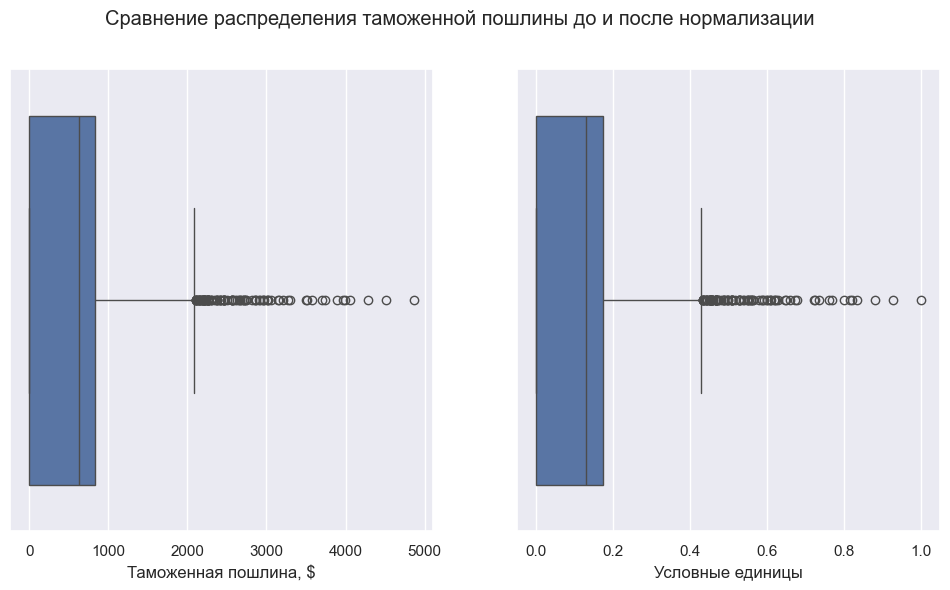

In [222]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 6))
fig.suptitle("Сравнение распределения таможенной пошлины до и после нормализации")
sns.boxplot(cars_enc, x="levy", ax=ax[0]).set(xlabel="Таможенная пошлина, $")
sns.boxplot(cars_norm, x="levy", ax=ax[1]).set(xlabel="Условные единицы");

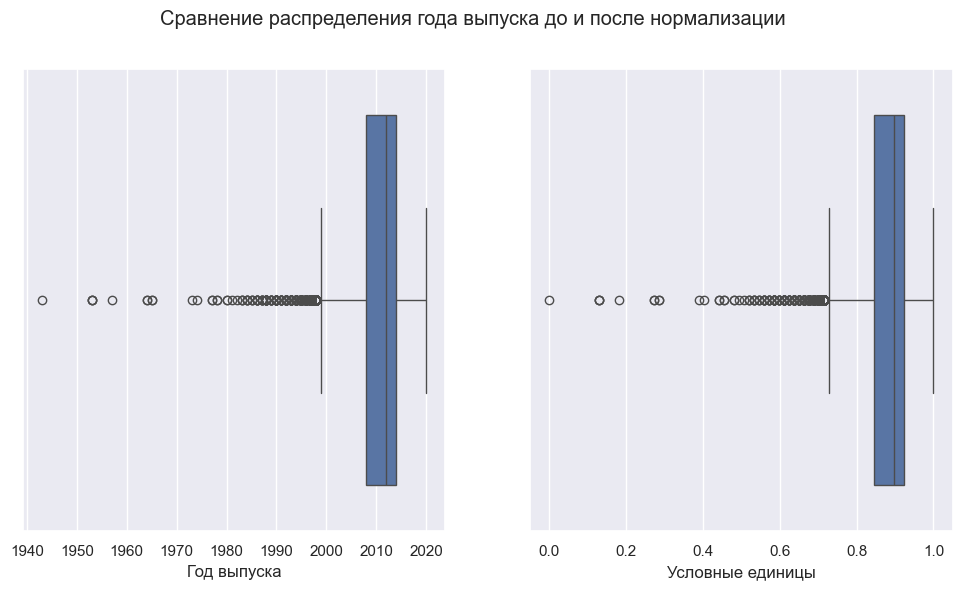

In [223]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 6))
fig.suptitle("Сравнение распределения года выпуска до и после нормализации")
sns.boxplot(cars_enc, x="prod_year", ax=ax[0]).set(xlabel="Год выпуска")
sns.boxplot(cars_norm, x="prod_year", ax=ax[1]).set(xlabel="Условные единицы");

## Применение метода главных компонент

Используем метод главных компонент и посмотрим на получившиеся точки.

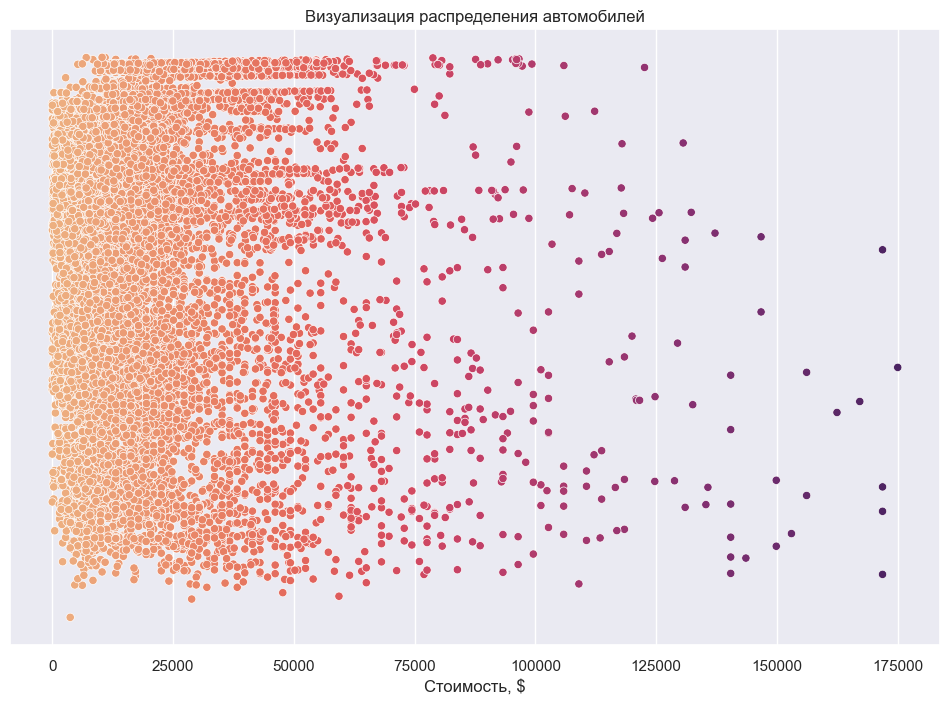

In [224]:
cars_pca = PCA(n_components=2)
cars_2d = cars_pca.fit_transform(cars_norm)

min_2d, max_2d = min(cars_2d[:, 0]), max(cars_2d[:, 0])
step_2d = (max_2d - min_2d) / 7
xticks_2d = range(int(min_2d), int(max_2d), int(step_2d))

plt.figure(figsize=(12, 8))

sns.scatterplot(
    x=cars_2d[:, 0], y=cars_2d[:, 1], hue=cars_norm.price, palette="flare", legend=None
).set(
    title="Визуализация распределения автомобилей", xlabel="Стоимость, $",
    xticks=xticks_2d, xticklabels=range(0, 175001, 25000), yticks=[]
);